#  PM Project - Coded

# Problem - 1
###### Context
The comp-activ database comprises activity measures of computer systems. Data was gathered from a Sun Sparcstation 20/712 with 128 Mbytes of memory, operating in a multi-user university department. Users engaged in diverse tasks, such as internet access, file editing, and CPU-intensive programs.

Being an aspiring data scientist, you aim to establish a linear equation for predicting 'usr' (the percentage of time CPUs operate in user mode). Your goal is to analyze various system attributes to understand their influence on the system's 'usr' mode.

#### Data Description :

System measures used:

lread - Reads (transfers per second ) between system memory and user memory

lwrite - writes (transfers per second) between system memory and user memory

scall - Number of system calls of all types per second

sread - Number of system read calls per second .

swrite - Number of system write calls per second .

fork - Number of system fork calls per second.

exec - Number of system exec calls per second.

rchar - Number of characters transferred per second by system read calls

wchar - Number of characters transfreed per second by system write calls

pgout - Number of page out requests per second

ppgout - Number of pages, paged out per second

pgfree - Number of pages per second placed on the free list.

pgscan - Number of pages checked if they can be freed per second

atch - Number of page attaches (satisfying a page fault by reclaiming a page in 
memory) per second

pgin - Number of page-in requests per second

ppgin - Number of pages paged in per second

pflt - Number of page faults caused by protection errors (copy-on-writes).

vflt - Number of page faults caused by address translation .

runqsz - Process run queue size (The number of kernel threads in memory that 
are waiting for a CPU to run.Typically, this value should be less than 2. Consistently higher values mean that the system might be CPU-bound.)

freemem - Number of memory pages available to user processes

freeswap - Number of disk blocks available for page swapping.

usr - Portion of time (%) that cpus run in user mode

### Problem 1-1 - Define the problem and perform exploratory Data Analysis
- Problem definition - Check shape, Data types, statistical summary - Univariate analysis - Multivariate analysis - Use appropriate visualizations to identify the patterns and insights - Key meaningful observations on individual variables and the relationship between variables

In [3]:
##importing libaries
#NumPy is a powerful library for numerical operations in Python
import numpy as np
#Pandas is a data manipulation library
import pandas as pd
#Seaborn is a statistical data visualization library based on Matplotlib
import seaborn as sns
#fitting linear regression models and making predictions based on the input features.
from sklearn.linear_model import LinearRegression
#The metrics module in scikit-learn provides various metrics for evaluating the performance of machine learning models.
from sklearn import metrics
# Matplotlib is a plotting library in Python
import matplotlib.pyplot as plt
#This import allows you to customize the style of your Matplotlib plots. 
import matplotlib.style

In [4]:
#read the data set
df=pd.read_excel("compactiv.xlsx")

In [5]:
#print first 5 rows of data set
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

#### 1-1-a) Check shape

In [6]:

#check the shape of the data set
df.shape

(8192, 22)

data set have 8192 rows and 22 columns

#### 1-1-2)-Data types

In [7]:
#check the data types of te each column of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

13 float ,8 int,1 object data types in thhe data set

#### 1-1-3)-statistical summary 

In [8]:
#statistical summary of te data set
df.describe()

lread       lwrite         scall        sread       swrite  \
count  8192.000000  8192.000000   8192.000000  8192.000000  8192.000000   
mean     19.559692    13.106201   2306.318237   210.479980   150.058228   
std      53.353799    29.891726   1633.617322   198.980146   160.478980   
min       0.000000     0.000000    109.000000     6.000000     7.000000   
25%       2.000000     0.000000   1012.000000    86.000000    63.000000   
50%       7.000000     1.000000   2051.500000   166.000000   117.000000   
75%      20.000000    10.000000   3317.250000   279.000000   185.000000   
max    1845.000000   575.000000  12493.000000  5318.000000  5456.000000   

              fork         exec         rchar         wchar        pgout  ...  \
count  8192.000000  8192.000000  8.088000e+03  8.177000e+03  8192.000000  ...   
mean      1.884554     2.791998  1.973857e+05  9.590299e+04     2.285317  ...   
std       2.479493     5.212456  2.398375e+05  1.408417e+05     5.307038  ...   
min       0.000000     0.000000  2.780000e+02  1.498000e+03     0.000000  ...   
25%       0.400000     0.200000  3.409150e+04  2.291600e+04     0.000000  ...   
50%       0.800000     1.200000  1.254735e+05  4.661900e+04     0.000000  ...   
75%       2.200000     2.800000  2.678288e+05  1.061010e+05     2.400000  ...   
max      20.120000    59.560000  2.526649e+06  1.801623e+06    81.440000  ...   

            pgfree       pgscan         atch         pgin        ppgin  \
count  8192.000000  8192.000000  8192.000000  8192.000000  8192.000000   
mean     11.919712    21.526849     1.127505     8.277960    12.388586   
std      32.363520    71.141340     5.708347    13.874978    22.281318   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.600000     0.600000   
50%       0.000000     0.000000     0.000000     2.800000     3.800000   
75%       5.000000     0.000000     0.600000     9.765000    13.800000   
max     523.000000  1237.000000   211.580000   141.200000   292.610000   

              pflt         vflt       freemem      freeswap          usr  
count  8192.000000  8192.000000   8192.000000  8.192000e+03  8192.000000  
mean    109.793799   185.315796   1763.456299  1.328126e+06    83.968872  
std     114.419221   191.000603   2482.104511  4.220194e+05    18.401905  
min       0.000000     0.200000     55.000000  2.000000e+00     0.000000  
25%      25.000000    45.400000    231.000000  1.042624e+06    81.000000  
50%      63.800000   120.400000    579.000000  1.289290e+06    89.000000  
75%     159.600000   251.800000   2002.250000  1.730380e+06    94.000000  
max     899.800000  1365.000000  12027.000000  2.243187e+06    99.000000  

[8 rows x 21 columns]

#### 1-1-4-Univariate analysis 

In [30]:
#create new data frame with all numerical variables
df_num = df.select_dtypes(include=['int', 'float'])

In [10]:
df_num.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'usr'],
      dtype='object')

In [11]:
# create data frame with all categorical variables
df_cat=df.select_dtypes(include=["object"])

In [12]:
df_cat

runqsz
0         CPU_Bound
1     Not_CPU_Bound
2     Not_CPU_Bound
3     Not_CPU_Bound
4     Not_CPU_Bound
...             ...
8187      CPU_Bound
8188  Not_CPU_Bound
8189  Not_CPU_Bound
8190      CPU_Bound
8191      CPU_Bound

[8192 rows x 1 columns]

In [13]:
df_num.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'usr'],
      dtype='object')

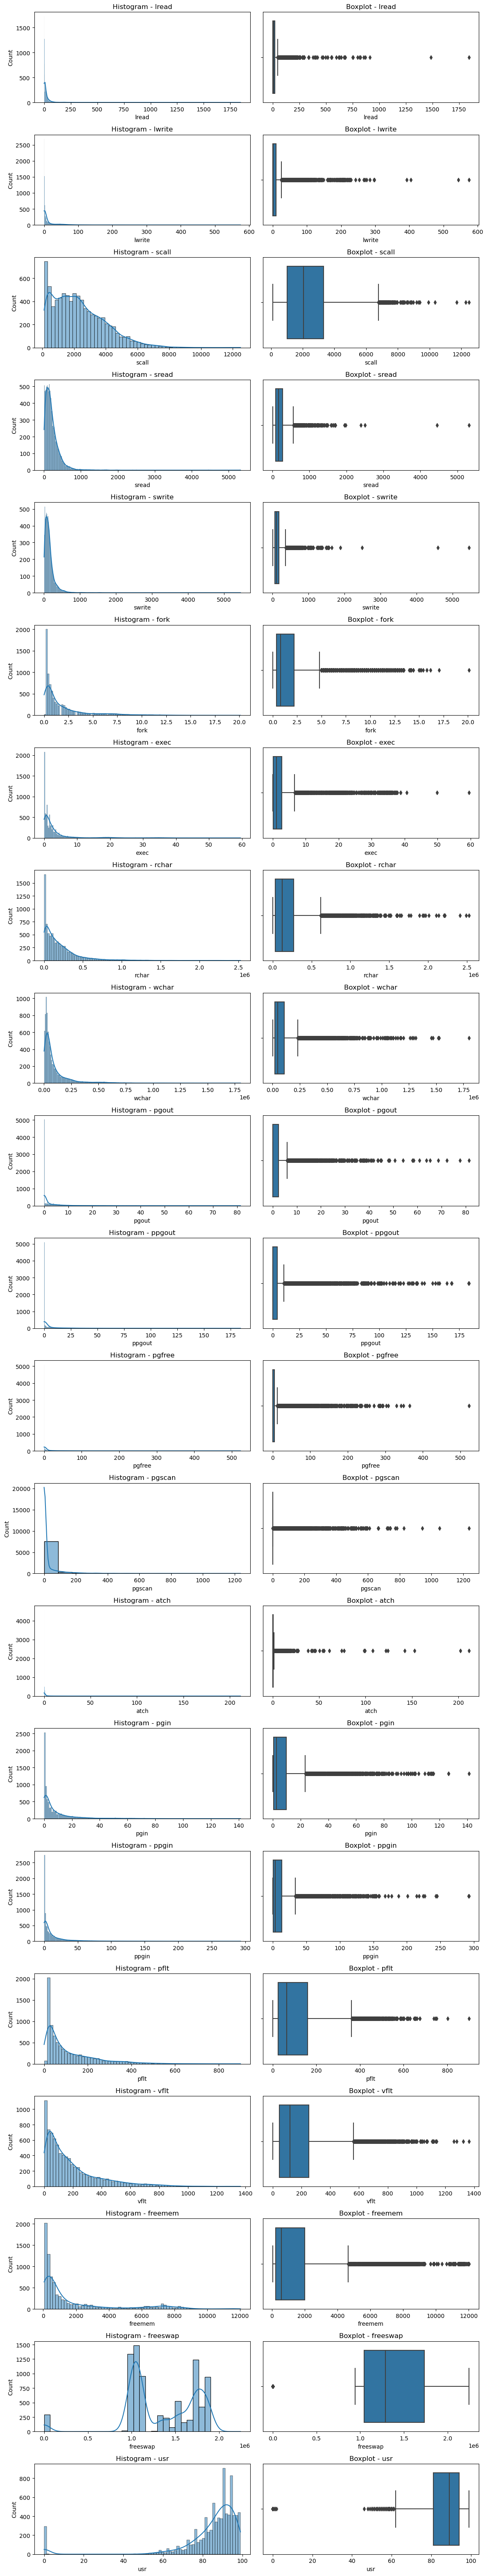

In [14]:
fig, axes = plt.subplots(nrows=len(df_num.columns), ncols=2,figsize=(12, 3 * len(df_num.columns)))
# Loop through numerical columns and create histograms and boxplots
for i, col in enumerate(df_num.columns):
    # Histogram
    sns.histplot(df_num[col], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram - {col}')

    # Boxplot
    sns.boxplot(x=df_num[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot - {col}')

# Adjust layout
plt.tight_layout()
plt.show()

* 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem' these have outliers in higher values.
* 'freeswap','usr' these 2 have outliers in lower values.

##### univariate analysis for categorical variable

<Axes: xlabel='runqsz', ylabel='count'>

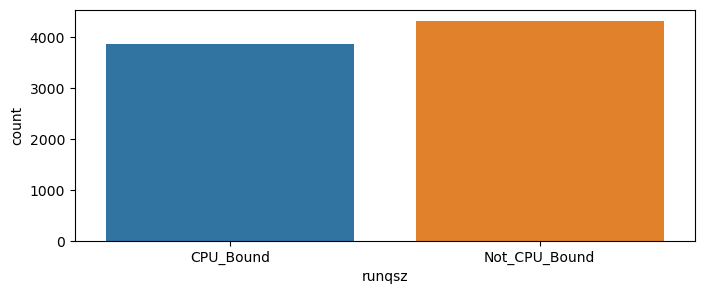

In [15]:
#count plot of runqsz
plt.figure(figsize=(8,3))
sns.countplot(data=df,x="runqsz")

 Process run queue size is not_cpu_bond(less than 2 ) more than cpu_bond.

#### 1-1-5-Multivariate analysis

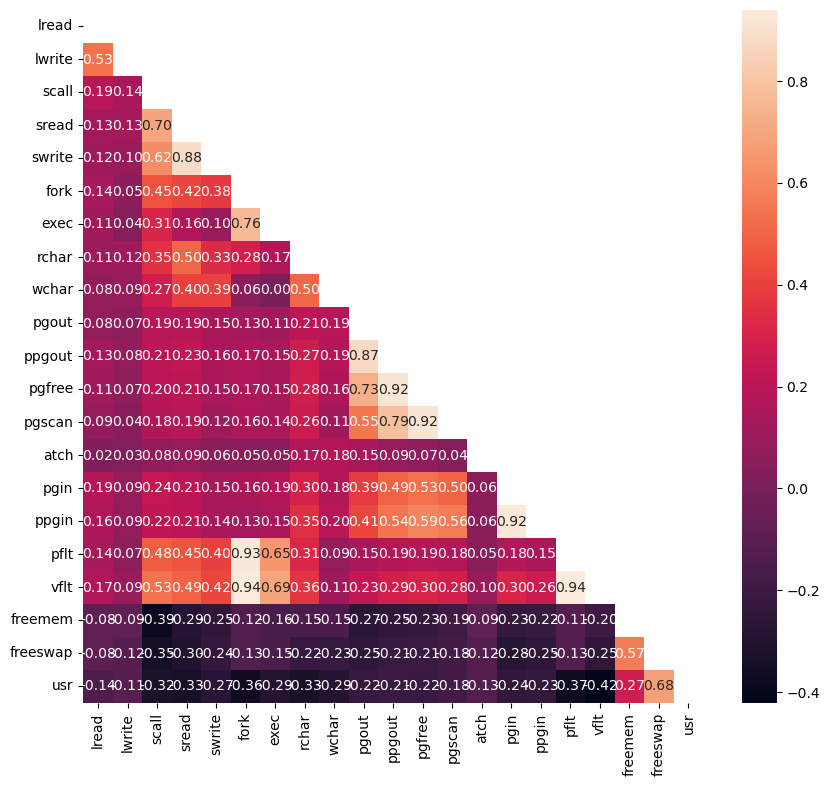

In [16]:
#plot the correlation map
corr = df_num.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool_)) 
fig = plt.subplots(figsize=(10, 9))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

* usr  is highly  correlated between freemem,freeswap.
* usr is negatively correlated between other 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt'.
* fork is highly correlated between pflt,vflt.

<Figure size 1000x1000 with 0 Axes>

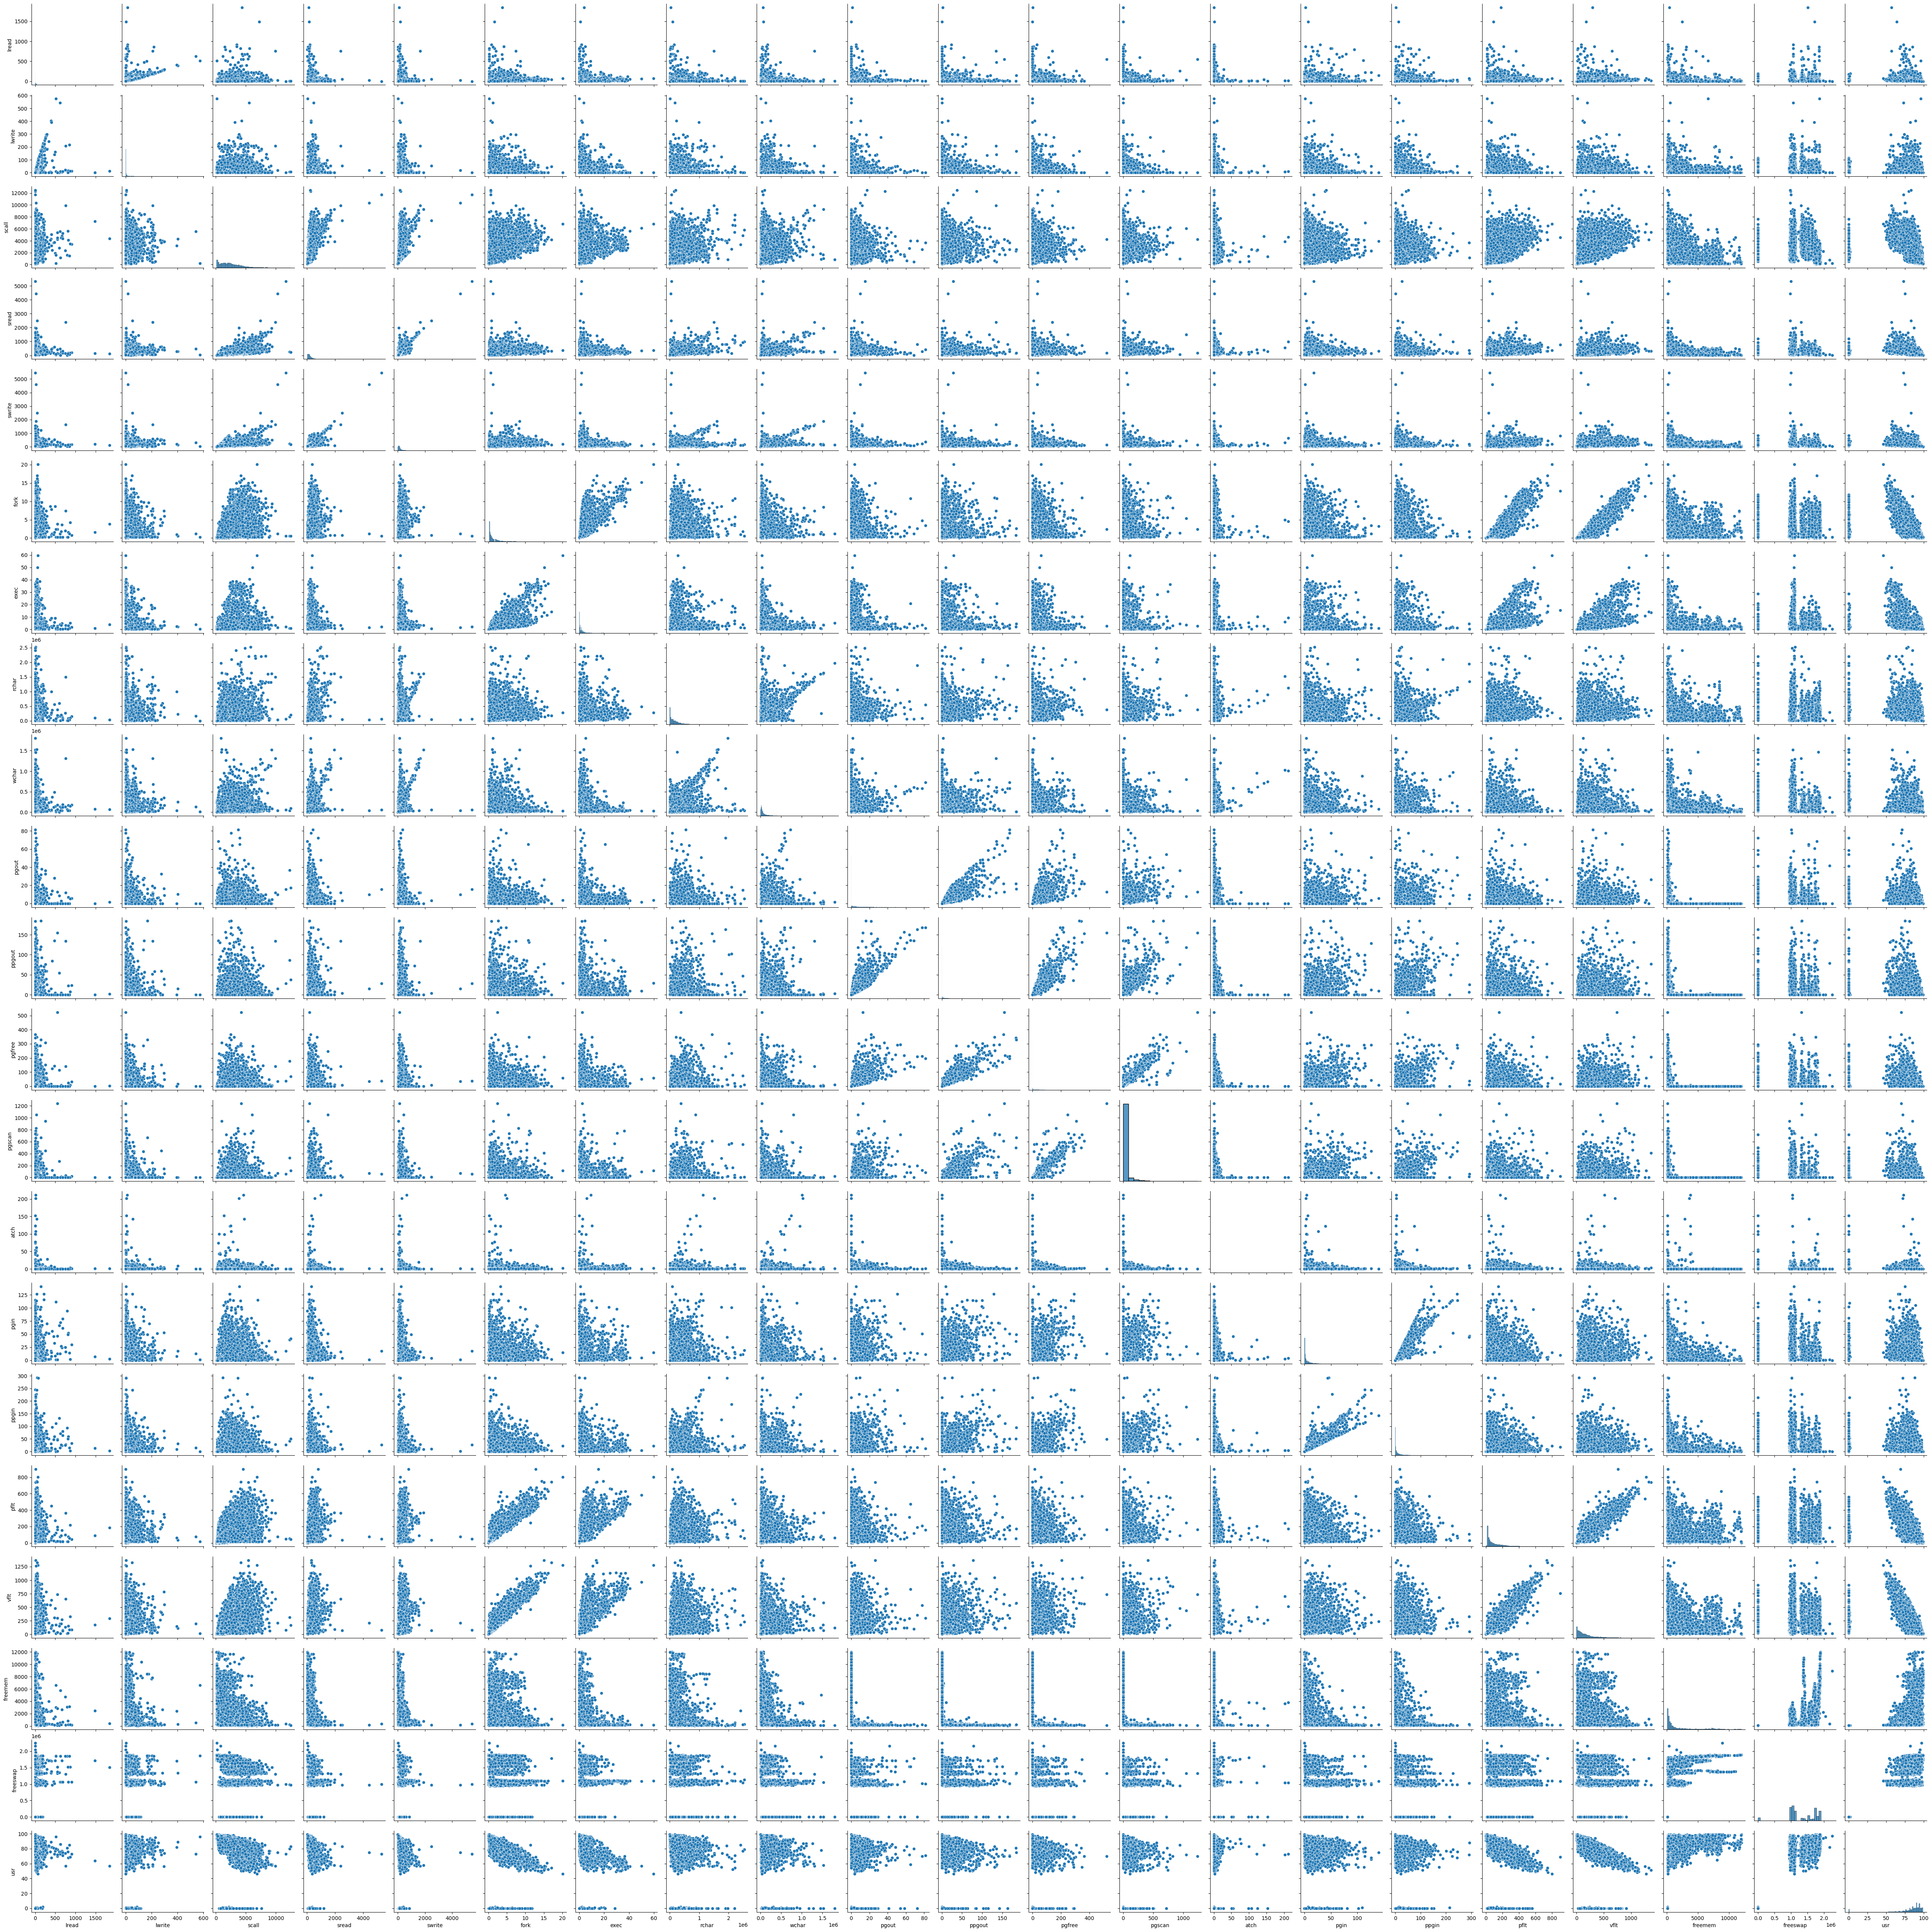

In [17]:
#pair plot
plt.figure(figsize=(10,10))
sns.pairplot(df_num)
plt.show()

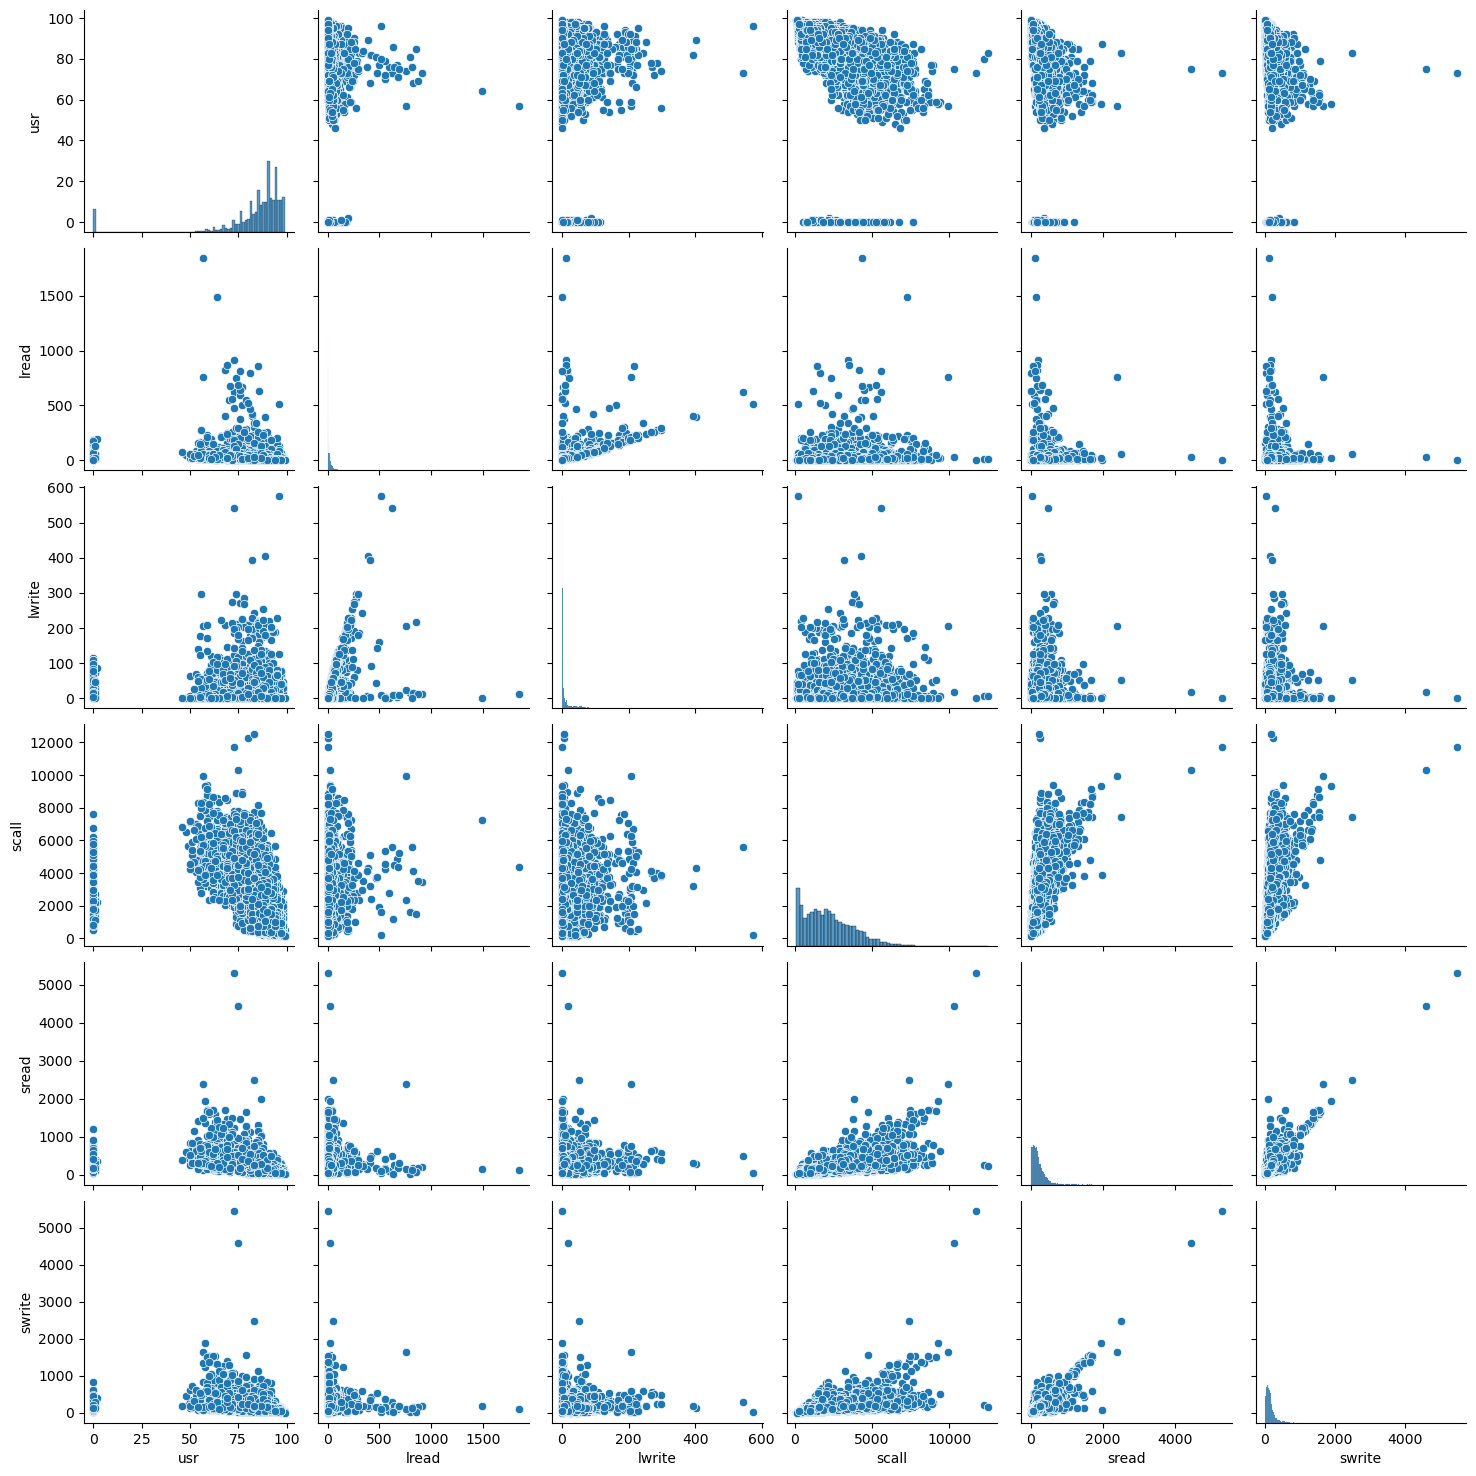

In [19]:
# Multivariate analysis
# Pair plot to visualize relationships between variables
sns.pairplot(df_num[['usr', 'lread', 'lwrite', 'scall', 'sread', 'swrite']])
plt.show()

'usr', 'lread', 'lwrite', 'scall', 'sread', 'swrite'this are decreasing when increasing usr .this means the these are inversely propotional to the usr.

#### 1-1-6,1-1-7)-Use appropriate visualizations to identify the patterns and insights - Key meaningful observations on individual variables and the relationship between variables


<Axes: xlabel='runqsz', ylabel='usr'>

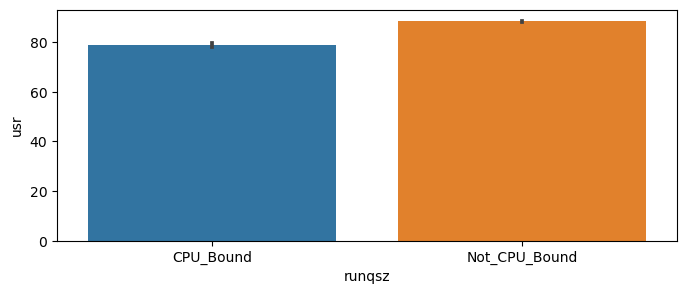

In [20]:
#create barplot of usr with runqsz
plt.figure(figsize=(8,3))
sns.barplot(data=df,y="usr",x="runqsz")

Portion of time (%) that cpus run in user mode is not_cpu_bound is higer than cpu_bond

#### insights:
   **Key Meaningful Observations:**

1. **Dataset Overview:**
   - The dataset comprises 8192 rows and 22 columns.
   - Data types include 13 float columns, 8 integer columns, and 1 object column.

2. **Outliers:**
   - Outliers in Higher Values:
      - 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin', 'pflt', 'vflt', 'freemem'.
   - Outliers in Lower Values:
      - 'freeswap', 'usr'.

3. **Process Run Queue Size:**
   - The process run queue size indicates whether the system is CPU-bound.
   - Observed that the process run queue size is not CPU-bound (less than 2), suggesting a system that is not consistently waiting for CPU resources.

4. **Correlations:**
   - **Positive Correlations:**
      - 'usr' is highly positively correlated with 'freemem' and 'freeswap'.
   - **Negative Correlations:**
      - 'usr' is negatively correlated with 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin', 'pflt', 'vflt'.
      - 'fork' is highly negatively correlated with 'pflt' and 'vflt'.
5. **Null values and zero values:**
    "rchar","wchar" these columns have null values,this data set have many zero values,                  percentages for zero values  
   - pgout        --59.545898
    -  ppgout       --59.545898
   - pgfree       --59.436035
   - pgscan      --100.000000
   - atch         --55.847168
   - pgin         --14.892578
   - ppgin        --14.892578
   - pflt          --0.036621
   - lread         --8.239746
   - lwrite       --32.763672
   
**Relationship Between Variables:**

1. **Memory and User Mode:**
   - 'usr' is highly correlated with both 'freemem' and 'freeswap', suggesting that the user mode percentage is influenced by the availability of memory resources.

2. **CPU-Bound Observation:**
   - The portion of time (%) that CPUs run in user mode ('usr') is higher when the system is not CPU-bound. This implies that when the process run queue size is less than 2, the system is not consistently waiting for CPU resources, and 'usr' is higher.

3. **Negative Correlations:**
   - 'usr' has negative correlations with various system attributes ('lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin', 'pflt', 'vflt'). This suggests that as these activities increase, the user mode percentage tends to decrease.
   
   * This negative correlation suggests that when the system is more actively involved in these operations, there is a tendency for a lower portion of time spent in user mode. It implies that high levels of these activities may require more kernel-level processing, leading to a decrease in user mode time.

4. **Fork and Page Faults:**
   - 'fork' is highly correlated with page faults ('pflt' and 'vflt'), indicating that forking processes may contribute to protection errors and address translation faults.

5. **Outlier Impact:**
     * 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin', 'pflt', 'vflt', 'freemem' these have outliers in higher values.
     * 'freeswap','usr' these 2 have outliers in lower values.
      * Understanding the impact of outliers in higher and lower values on the analysis is crucial. Further investigation or treatment of outliers may be necessary.

### Problem 1-2 - Data Pre-processing
Prepare the data for modelling: - Missing Value Treatment (if needed) - Outlier Detection (treat, if needed) - Feature Engineering - Encode the data - Train-test split

#### 1-2-1)- Missing Value Treatment (if needed)

In [21]:
# chekcing null values
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

there are 104 null values in "rchar",15 null values in "wchar" columns.

In [22]:
# replace null values by its means 
df_num.rchar=df_num.rchar.fillna(df_num.rchar.mean()) 
df_num.wchar=df_num.wchar.fillna(df_num.wchar.mean())

In [23]:
#after treatment checking the null values 
df_num.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
freemem     0
freeswap    0
usr         0
dtype: int64

In [24]:
zero_counts = df.eq(0).sum()

print("Number of zeros in each column:")
pr=(zero_counts/df.shape[0])*100
print(pr)

Number of zeros in each column:
lread        8.239746
lwrite      32.763672
scall        0.000000
sread        0.000000
swrite       0.000000
fork         0.256348
exec         0.256348
rchar        0.000000
wchar        0.000000
pgout       59.545898
ppgout      59.545898
pgfree      59.436035
pgscan      78.710938
atch        55.847168
pgin        14.892578
ppgin       14.892578
pflt         0.036621
vflt         0.000000
runqsz       0.000000
freemem      0.000000
freeswap     0.000000
usr          3.454590
dtype: float64


#### 1-2-2)-Outlier Detection (treat, if needed) 

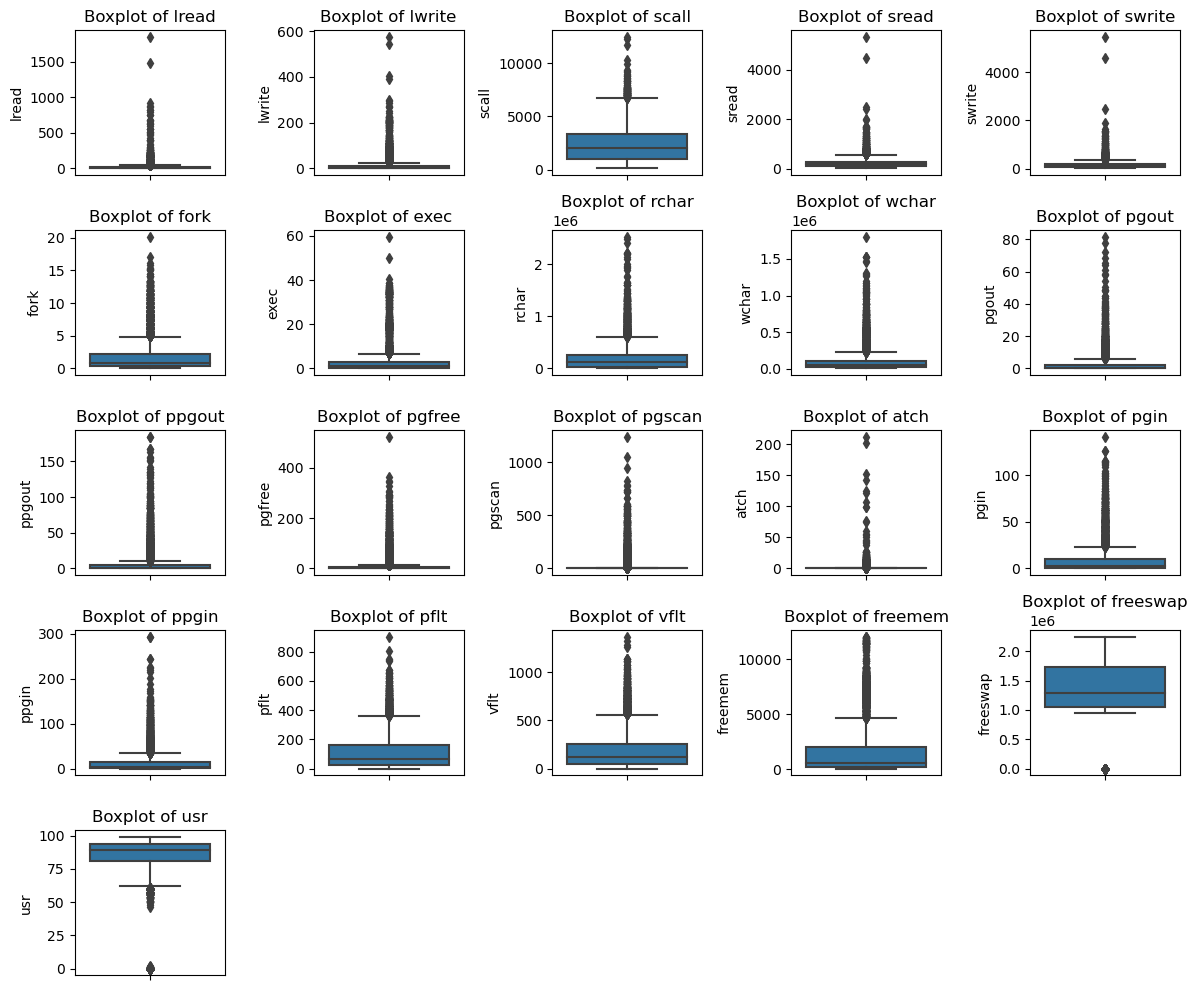

In [25]:
#checking outliers using boxplot
plt.figure(figsize = (12,10))
lists = df_num.columns
for i in range(len(lists)):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y = df_num[lists[i]], data = df_num)
    plt.title('Boxplot of {}'.format(lists[i]))
    plt.tight_layout()

* 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
* 'pflt', 'vflt', 'freemem' these have outliers in higher values.
  'freeswap','usr' these 2 have outliers in lower values.

In [26]:
#remove outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [27]:
for i in df_num.columns:
    lw,hi=remove_outlier(df_num[i])
    df_num[i]=np.where(df_num[i]<lw,lw,df_num[i])
    df_num[i]=np.where(df_num[i]>hi,hi,df_num[i])
    

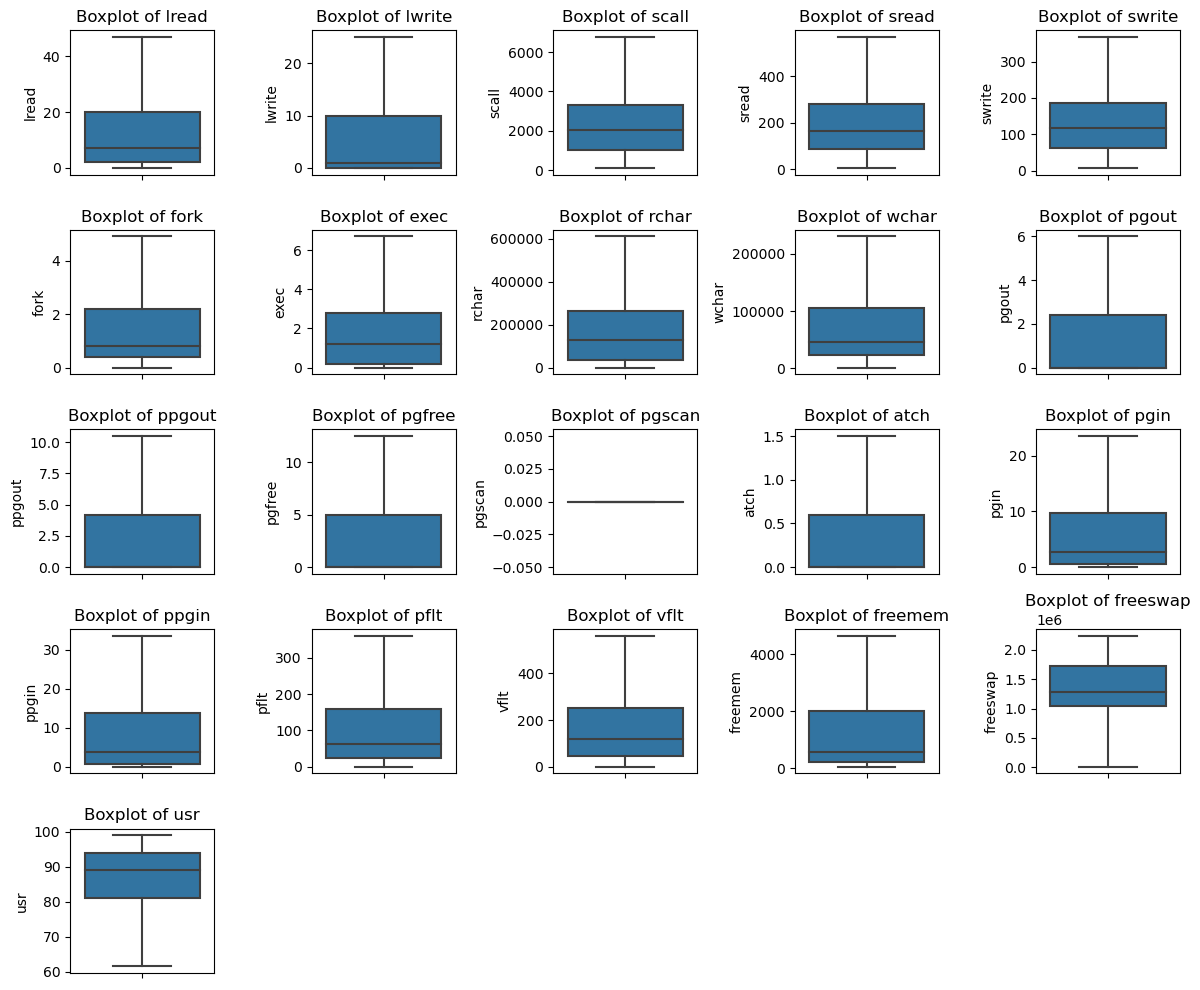

In [28]:
#checking outliers using boxplot
plt.figure(figsize = (12,10))
lists = df_num.columns
for i in range(len(lists)):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y = df_num[lists[i]], data = df_num)
    plt.title('Boxplot of {}'.format(lists[i]))
    plt.tight_layout()

#### 1-2-3)-Feature Engineering 


Insights
1. Observed null values in 2 fields rchar and wchar.
2. We imputed the null values with median value of the data set
3. Most of the of the continuous fields had outliers and we have treated them using the IQR approach
4. In this case, it is not necessary to scale the data as, we'll get an equivalent solution whether we apply some kind of linear scaling or not. For example, to find the best parameter values of a linear regression model, there is a closed-form solution, called the Normal Equation. If our implementation makes use of that equation, there is no stepwise optimization process, so feature scaling is not necessary
5. Removing the records with 0 values is  not necessity ,as it might not have an impact on the model building.

In [29]:
#copy the numerical frame to knew data frame
df_new=df_num.copy()

In [30]:
#add object colum to new data frame
df_new = pd.concat([df_new, df["runqsz"]], axis=1)

In [31]:
#print first 5 rows of new data frame
df_new.head()

lread  lwrite   scall  sread  swrite  fork  exec          rchar    wchar  \
0    1.0     0.0  2147.0   79.0    68.0   0.2   0.2   40671.000000  53995.0   
1    0.0     0.0   170.0   18.0    21.0   0.2   0.2     448.000000   8385.0   
2   15.0     3.0  2162.0  159.0   119.0   2.0   2.4  197385.728363  31950.0   
3    0.0     0.0   160.0   12.0    16.0   0.2   0.2  197385.728363   8670.0   
4    5.0     1.0   330.0   39.0    38.0   0.4   0.4  197385.728363  12185.0   

   pgout  ...  pgscan  atch  pgin  ppgin    pflt    vflt   freemem   freeswap  \
0    0.0  ...     0.0   0.0   1.6    2.6   16.00   26.40  4659.125  1730946.0   
1    0.0  ...     0.0   0.0   0.0    0.0   15.63   16.83  4659.125  1869002.0   
2    0.0  ...     0.0   1.2   6.0    9.4  150.20  220.20   702.000  1021237.0   
3    0.0  ...     0.0   0.0   0.2    0.2   15.60   16.80  4659.125  1863704.0   
4    0.0  ...     0.0   0.0   1.0    1.2   37.80   47.60   633.000  1760253.0   

    usr         runqsz  
0  95.0      CPU_Bound  
1  97.0  Not_CPU_Bound  
2  87.0  Not_CPU_Bound  
3  98.0  Not_CPU_Bound  
4  90.0  Not_CPU_Bound  

[5 rows x 22 columns]

In [32]:
df_new.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'usr', 'runqsz'],
      dtype='object')

### 1-2-4) Encode the data 

In [33]:
#encode data
df_new=pd.get_dummies(df_new,columns=["runqsz"],drop_first=True)

In [34]:
df_new.head()

lread  lwrite   scall  sread  swrite  fork  exec          rchar    wchar  \
0    1.0     0.0  2147.0   79.0    68.0   0.2   0.2   40671.000000  53995.0   
1    0.0     0.0   170.0   18.0    21.0   0.2   0.2     448.000000   8385.0   
2   15.0     3.0  2162.0  159.0   119.0   2.0   2.4  197385.728363  31950.0   
3    0.0     0.0   160.0   12.0    16.0   0.2   0.2  197385.728363   8670.0   
4    5.0     1.0   330.0   39.0    38.0   0.4   0.4  197385.728363  12185.0   

   pgout  ...  pgscan  atch  pgin  ppgin    pflt    vflt   freemem   freeswap  \
0    0.0  ...     0.0   0.0   1.6    2.6   16.00   26.40  4659.125  1730946.0   
1    0.0  ...     0.0   0.0   0.0    0.0   15.63   16.83  4659.125  1869002.0   
2    0.0  ...     0.0   1.2   6.0    9.4  150.20  220.20   702.000  1021237.0   
3    0.0  ...     0.0   0.0   0.2    0.2   15.60   16.80  4659.125  1863704.0   
4    0.0  ...     0.0   0.0   1.0    1.2   37.80   47.60   633.000  1760253.0   

    usr  runqsz_Not_CPU_Bound  
0  95.0                     0  
1  97.0                     1  
2  87.0                     1  
3  98.0                     1  
4  90.0                     1  

[5 rows x 22 columns]

In [35]:
#check  null values
df_new.isnull().sum()

lread                   0
lwrite                  0
scall                   0
sread                   0
swrite                  0
fork                    0
exec                    0
rchar                   0
wchar                   0
pgout                   0
ppgout                  0
pgfree                  0
pgscan                  0
atch                    0
pgin                    0
ppgin                   0
pflt                    0
vflt                    0
freemem                 0
freeswap                0
usr                     0
runqsz_Not_CPU_Bound    0
dtype: int64

has no null values .

In [36]:
#drop the "pgscan" column from new data frame because all values are zero in new dataframe
df_new=df_new.drop("pgscan",axis=1)

#### 1-2- 5)-Train-test split

In [37]:
# Copy target into the y dataframe. 
y=df_new["usr"]
# Copy all the predictor variables into X dataframe
x=df_new.drop("usr",axis=1)

In [38]:
#print first 5 rows of x frame
x.head()

lread  lwrite   scall  sread  swrite  fork  exec          rchar    wchar  \
0    1.0     0.0  2147.0   79.0    68.0   0.2   0.2   40671.000000  53995.0   
1    0.0     0.0   170.0   18.0    21.0   0.2   0.2     448.000000   8385.0   
2   15.0     3.0  2162.0  159.0   119.0   2.0   2.4  197385.728363  31950.0   
3    0.0     0.0   160.0   12.0    16.0   0.2   0.2  197385.728363   8670.0   
4    5.0     1.0   330.0   39.0    38.0   0.4   0.4  197385.728363  12185.0   

   pgout  ppgout  pgfree  atch  pgin  ppgin    pflt    vflt   freemem  \
0    0.0     0.0     0.0   0.0   1.6    2.6   16.00   26.40  4659.125   
1    0.0     0.0     0.0   0.0   0.0    0.0   15.63   16.83  4659.125   
2    0.0     0.0     0.0   1.2   6.0    9.4  150.20  220.20   702.000   
3    0.0     0.0     0.0   0.0   0.2    0.2   15.60   16.80  4659.125   
4    0.0     0.0     0.0   0.0   1.0    1.2   37.80   47.60   633.000   

    freeswap  runqsz_Not_CPU_Bound  
0  1730946.0                     0  
1  1869002.0                     1  
2  1021237.0                     1  
3  1863704.0                     1  
4  1760253.0                     1

In [39]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

### Problem 1-3- Model Building - Linear regression
- Apply linear Regression using Sklearn - Using Statsmodels Perform checks for significant variables using the appropriate method - Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare.

#### linear Regression using Sklearn

In [ ]:
# Initialize and fit the linear regression model
model=LinearRegression()
model.fit(x_train,y_train)

In [ ]:
# Make predictions on the test set and train data
y_pred_test = model.predict(x_test)
y_pred_train=model.predict(x_train)

In [42]:
# Assuming 'model' is your trained linear regression model
coefficients = model.coef_

# Create a DataFrame with column names and corresponding coefficients
coefficients_df = pd.DataFrame({'Column': x.columns, 'Coefficient': coefficients})

# Print or use the coefficients DataFrame as needed
print(coefficients_df)

                  Column  Coefficient
0                  lread    -0.063410
1                 lwrite     0.048018
2                  scall    -0.000664
3                  sread     0.000339
4                 swrite    -0.005460
5                   fork     0.029633
6                   exec    -0.321063
7                  rchar    -0.000005
8                  wchar    -0.000005
9                  pgout    -0.366852
10                ppgout    -0.078609
11                pgfree     0.085258
12                  atch     0.630438
13                  pgin     0.019754
14                 ppgin    -0.067154
15                  pflt    -0.033592
16                  vflt    -0.005465
17               freemem    -0.000458
18              freeswap     0.000009
19  runqsz_Not_CPU_Bound     1.613737


In [43]:
#intercept of model
print('Intercept:', model.intercept_)

Intercept: 84.13143842096483


In [44]:
#mean squared error of test and train data
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_train,y_pred_train)
print("mean squared error(MSE) On training data:",mse)
MSE=mean_squared_error(y_test,y_pred_test)
print("mean squared error(MSE) On testing data:",MSE)

mean squared error(MSE) On training data: 19.52770837872794
mean squared error(MSE) On testing data: 21.64966602459875


In [38]:
# Calculate Root Mean Squared Error (RMSE)
rmse_test = np.sqrt(mse)
rmse_train = np.sqrt(MSE)

# Calculate R-squared
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
print(f'Root Mean Squared Error (RMSE) - Test: {rmse_test:.4f}, Train: {rmse_train:.4f}')
print(f'R-squared - Test: {r2_test:.4f}, Train: {r2_train:.4f}')


NameError: name 'mse' is not defined

In [ ]:
# Number of observations and predictors
n_test, k_test = len(y_test), x_test.shape[1]
n_train, k_train = len(y_train), x_train.shape[1]

# Calculate Adjusted R-squared
adj_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - k_test - 1))
adj_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - k_train - 1))

print(f'Adjusted R-squared - Test: {adj_r2_test:.4f}, Train: {adj_r2_train:.4f}')

* Linear Regression model accuracy of training data: 0.7961565330395103, so 80% of the variation in the user is explained by the predictors in the model for the training set.
* Linear Regression model accuracy of testing data: 0.7676695029858773, so 78% of the variation in the user is explained by the predictors in the model for the test.

#### Linear Regression Using Statsmodels

In [48]:
#apply linear regression and fit 
import statsmodels.api as sm
x_with_const=sm.add_constant(x_train)
model_sm=sm.OLS(y_train,x_with_const).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1116.
Date:                Thu, 11 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:09:26   Log-Likelihood:                -16656.
No. Observations:                5734   AIC:                         3.335e+04
Df Residuals:                    5713   BIC:                         3.349e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1314 

In [49]:
x_train.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'atch', 'pgin', 'ppgin', 'pflt',
       'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [50]:
# Root Mean Squared Error (RMSE) for training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f'Training RMSE: {rmse_train}')
# R-squared and Adjusted R-squared for training set
from sklearn.metrics import  r2_score
r_squared_train = r2_score(y_train, y_pred_train)
n_train, k_train = x_train.shape[0], x_train.shape[1]
adj_r_squared_train = 1 - ((1 - r_squared_train) * (n_train - 1) / (n_train - k_train - 1))
print(f'Training R-squared: {r_squared_train}')
print(f'Training Adjusted R-squared: {adj_r_squared_train}')

Training RMSE: 4.419016675543094
Training R-squared: 0.7961565330395103
Training Adjusted R-squared: 0.7954429203422917


In [51]:
# Root Mean Squared Error (RMSE) for test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'Test RMSE: {rmse_test}')
# R-squared and Adjusted R-squared for test set
r_squared_test = r2_score(y_test, y_pred_test)
n_test, k_test = x_test.shape[0], x_test.shape[1]
adj_r_squared_test = 1 - ((1 - r_squared_test) * (n_test - 1) / (n_test - k_test - 1))
print(f'Test R-squared: {r_squared_test}')
print(f'Test Adjusted R-squared: {adj_r_squared_test}')

Test RMSE: 4.652920160995539
Test R-squared: 0.7676695029858773
Test Adjusted R-squared: 0.7657628103554783


In [52]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

lread                    9.504596
lwrite                   6.548395
scall                    8.826526
sread                   18.169718
swrite                  16.767689
fork                    25.002523
exec                     6.092313
rchar                    4.361875
wchar                    3.344787
pgout                   16.004026
ppgout                  40.799885
pgfree                  22.974096
atch                     2.736070
pgin                    23.072561
ppgin                   23.162737
pflt                    24.685476
vflt                    33.872228
freemem                  3.406754
freeswap                 7.114274
runqsz_Not_CPU_Bound     2.155858
dtype: float64



AS few predictors have VIF values > 5 therefore there is some multicolinearity in the data
We remove those predictors with multicolinarity due to which there is least impact on the adjusted R2

* Variance Inflation Factor (VIF) is one of the methods to check if independent variables havecorrelation between them. If they are correlated, then it is not ideal for linear regression models asthey inflate the standard errors which in turn affects the regression parameters. As a result, theregression model becomes non-reliable and lacks interpretability.
* General rule of thumb: If VIF values are equal to 1, then that means there is no multicollinearity. IfVIF values are equal to 5 or exceedingly more than 5, then there is moderate multicollinearity. If VIF is10 or more, then that means there is high collinearity.
* From the above I can conclude that variables have moderate correlation.

In [53]:
#drop "ppgout" for check
x_train2 = x_train.drop(["ppgout"], axis=1)
olsmod_1 = sm.OLS(y_train, x_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 6),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 6),
)

R-squared: 0.96508 
Adjusted R-squared: 0.964964


In [54]:
#check diffence between Adjusted rvalues of orginal and after droping "ppgout"
0.795-0.965

-0.16999999999999993

In [55]:
#drop "vflt" for check
x_train3 = x_train.drop(["vflt"], axis=1)
olsmod_2 = sm.OLS(y_train, x_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 6),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 6),
)

R-squared: 0.964999 
Adjusted R-squared: 0.964882


In [56]:
#drop "fork" for check
x_train4 = x_train.drop(["fork"], axis=1)
olsmod_3 = sm.OLS(y_train, x_train4)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 7),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 6),
)

R-squared: 0.9648555 
Adjusted R-squared: 0.964739


In [57]:
#drop "pflt" for check
x_train5 = x_train.drop(["pflt"], axis=1)
olsmod_4 = sm.OLS(y_train, x_train5)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 7),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 6),
)

R-squared: 0.9647796 
Adjusted R-squared: 0.964662


In [58]:
#drop "pgin" for check
x_train6 = x_train.drop(["pgin"], axis=1)
olsmod_5 = sm.OLS(y_train, x_train6)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 7),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 6),
)

R-squared: 0.9651407 
Adjusted R-squared: 0.965025


droping high vIF variables ,we get very high  effect on the adjusted R we can't choose to drop it 
.

 ### 1-4 - Business Insights & Recommendations
- Comment on the Linear Regression equation from the final model and impact of relevant variables (atleast 2) as per the equation - Conclude with the key takeaways (actionable insights and recommendations) for the business


#### The model equation will be as follows:

In [59]:
print("usr =")
for i in range(len(x_train.columns)):
    if i==0:
        print(model_sm.params[i],"+",end=" ")
    elif i!=len(x_train.columns)-1:
           print(
            model_sm.params[i],
            "* (",
            x_train.columns[i-1],
            ")",
            "+",
            end="  ",
        )
    else:
        print(model_sm.params[i], "* (", x_train.columns[i-1], ")")
        i=i+1
        print(model_sm.params[i], "* (", x_train.columns[i-1], ")")
        
        


usr =
84.13143842098094 + -0.06340997319302627 * ( lread ) +  0.04801838613981681 * ( lwrite ) +  -0.0006643523374678602 * ( scall ) +  0.00033858757891686887 * ( sread ) +  -0.0054598818143035965 * ( swrite ) +  0.02963299570810818 * ( fork ) +  -0.3210632504853652 * ( exec ) +  -5.211879156044134e-06 * ( rchar ) +  -5.346335455375872e-06 * ( wchar ) +  -0.3668522981361845 * ( pgout ) +  -0.0786092007452569 * ( ppgout ) +  0.08525820125748329 * ( pgfree ) +  0.6304380351235959 * ( atch ) +  0.019753855912710894 * ( pgin ) +  -0.06715372112650217 * ( ppgin ) +  -0.033591989662575365 * ( pflt ) +  -0.005464921751521254 * ( vflt ) +  -0.0004576614008071696 * ( freemem ) +  8.82932042043399e-06 * ( freeswap )
1.6137372384501392 * ( runqsz_Not_CPU_Bound )


##### Observations
* 1 unit increase in the Iwrite lead to a 0.04 times increase in the usr.
* 1 unit increase in the fork lead to a 0.03 times increase in the usr.
* if run que size is not CPU bonded  for a property it increses the usr by a factor of 1.61.

### Insights
###### System Call Efficiency:
The 'scall' variable has a negative coefficient, indicating that a higher number of system calls per second is associated with lower 'usr' values. To improve overall system performance, focus on optimizing and reducing unnecessary system calls.
###### Memory Management Impact:
Memory-related variables such as  'lwrite,' 'pgfree,' and 'freeswap' have significant coefficients. Efficient memory management is crucial for enhancing 'usr' values, and efforts should be directed toward minimizing page faults and optimizing memory usage.
###### CPU-Bound Processes:
The 'runqsz_Not_CPU_Bound' variable has a positive coefficient,
Optimize CPU-Bound Processes
Since the runqsz_Not_CPU_Bound variable is related to CPU-bound processes, optimizing these processes can lead to a reduction in the run queue size, positively impacting usr. Implement efficient task scheduling and resource allocation strategies to minimize CPU-bound situations.
###### Disk I/O Operations:
Variables related to disk I/O operations ('pgout' and 'ppgout') also impact 'usr.' Optimization of these operations, such as reducing the number of page out requests and pages paged out per second, can positively influence 'usr.'
###### Execution Calls and CPU Usage:
The 'exec' variable has a notable negative coefficient, indicating that a higher number of system exec calls per second is associated with lower 'usr' values. Streamlining and optimizing execution calls can lead to improved CPU usage efficiency.
###### Data Transfer Efficiency:
'swrite' and 'wchar' variables have negative coefficients, suggesting that optimizing write calls and character transfers between system write calls can positively impact 'usr' by reducing system delays.
###### Page Attachments and Page-In Requests:
'atch' and 'pgin' variables have positive coefficients, highlighting the importance of efficiently managing page attachments and page-in requests for better 'usr' values.
###### Model Confidence:
The overall model has a high R-squared value (0.796), indicating that a significant proportion of the variability in 'usr' can be explained by the selected system measures. However, it's crucial to monitor and validate the model's performance over time.

### Business Recommendations

###### Optimize System Executions:
Given the significant impact of the 'exec' variable on 'usr,' focus on optimizing and streamlining system executions. Work with the IT team to identify and minimize unnecessary system exec calls, potentially through code optimization or system configuration changes.
###### Efficient Memory Operations:
Improve the efficiency of memory operations, as indicated by positive coefficients for 'lwrite,' 'sread,' 'fork,' 'pgfree,' 'atch,' and 'pgin.' Consider optimizing data transfer and memory management processes to reduce latency and enhance overall system performance.
###### Reduce Unnecessary System Calls:
Negative coefficients for 'lread,' 'scall,' 'swrite,' 'rchar,' 'wchar,' 'pgout,' 'ppgout,' 'pflt,' 'vflt,' 'freemem,' and 'freeswap' suggest that decreasing unnecessary system calls and optimizing resource usage can positively impact 'usr.' Review and eliminate redundant or inefficient system calls.
###### Memory Optimization:
Optimize memory usage and reduce page faults ('pflt') and address translation errors ('vflt'). Efficient memory management can lead to a reduction in interruptions, improving the overall performance of the CPUs.
###### Optimize CPU-Bound Processes:
Since the runqsz_Not_CPU_Bound variable is related to CPU-bound processes, optimizing these processes can lead to a reduction in the run queue size, positively impacting usr. Implement efficient task scheduling and resource allocation strategies to minimize CPU-bound situations.
###### Collaboration with IT Teams:
Foster collaboration between business stakeholders and IT teams to implement and test optimizations. Regular communication and knowledge exchange between these teams are essential for aligning technical improvements with business objectives.
###### Training and Skill Development:
Invest in training and skill development for IT teams to stay updated on the latest technologies and best practices in system performance optimization. Ensuring that the team has the right skills is crucial for implementing effective solutions.


# Problem - 2
##### Objective
In your role as a statistician at the Republic of Indonesia Ministry of Health, you have been entrusted with a dataset containing information from a Contraceptive Prevalence Survey. This dataset encompasses data from 1473 married females who were either not pregnant or were uncertain of their pregnancy status during the survey.

Your task involves predicting whether these women opt for a contraceptive method of choice. This prediction will be based on a comprehensive analysis of their demographic and socio-economic attributes.

Data Description
1. Wife's age (numerical)
2. Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
3. Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
4. Number of children ever born (numerical)
5. Wife's religion (binary) Non-Scientology, Scientology
6. Wife's now working? (binary) Yes, No
7. Husband's occupation (categorical) 1, 2, 3, 4(random)
8. Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
9. Media exposure (binary) Good, Not good
10. Contraceptive method used (class attribute) No,Yes



### 2-1 - Define the problem and perform exploratory Data Analysis
- Problem definition - Check shape, Data types, statistical summary - Univariate analysis - Multivariate analysis - Use appropriate visualizations to identify the patterns and insights - Key meaningful observations on individual variables and the relationship between variables

In [60]:
#read the the data set
d=pd.read_excel("Contraceptive_method_dataset.xlsx")

In [61]:
#read first 5 rows
d.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [62]:
#check shape
d.shape

(1473, 10)

data set has 1473 rows and 10 columns

In [63]:
#Data types
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


* data set has 7 object,1 int,2 float type data types
* wife_age , No_of_children_born columns have null values

In [64]:
# statistical summary -
d.describe()

Wife_age  No_of_children_born  Husband_Occupation
count  1402.000000          1452.000000         1473.000000
mean     32.606277             3.254132            2.137814
std       8.274927             2.365212            0.864857
min      16.000000             0.000000            1.000000
25%      26.000000             1.000000            1.000000
50%      32.000000             3.000000            2.000000
75%      39.000000             4.000000            3.000000
max      49.000000            16.000000            4.000000

In [65]:
#check the duplicate values
d.duplicated().sum()

80

data set has 80 rows are duplicated values.

In [66]:
#drop the duplicated values
d.drop_duplicates(inplace=True)
d.duplicated().sum()

0

In [67]:
#Check the shape of data set
d.shape

(1393, 10)

In [68]:
#value counts of categorical variables.
for column in d.columns:
    if d[column].dtype == 'object':
        print(column.upper(),': ',d[column].nunique())
        print(d[column].value_counts().sort_values())
        print('\n')

WIFE_ EDUCATION :  4
Uneducated    150
Primary       330
Secondary     398
Tertiary      515
Name: Wife_ education, dtype: int64


HUSBAND_EDUCATION :  4
Uneducated     44
Primary       175
Secondary     347
Tertiary      827
Name: Husband_education, dtype: int64


WIFE_RELIGION :  2
Non-Scientology     207
Scientology        1186
Name: Wife_religion, dtype: int64


WIFE_WORKING :  2
Yes     350
No     1043
Name: Wife_Working, dtype: int64


STANDARD_OF_LIVING_INDEX :  4
Very Low     129
Low          227
High         419
Very High    618
Name: Standard_of_living_index, dtype: int64


MEDIA_EXPOSURE  :  2
Not-Exposed     109
Exposed        1284
Name: Media_exposure , dtype: int64


CONTRACEPTIVE_METHOD_USED :  2
No     614
Yes    779
Name: Contraceptive_method_used, dtype: int64




##### Univariate analysis

In [69]:
# create data frame with numerical columns
d_num = d.select_dtypes(include=['int', 'float'])

In [70]:
#create data frame with categorical columns
d_cat=d.select_dtypes(include=["object"])

In [71]:
d_cat.head()

Wife_ education Husband_education Wife_religion Wife_Working  \
0         Primary         Secondary   Scientology           No   
1      Uneducated         Secondary   Scientology           No   
2         Primary         Secondary   Scientology           No   
3       Secondary           Primary   Scientology           No   
4       Secondary         Secondary   Scientology           No   

  Standard_of_living_index Media_exposure  Contraceptive_method_used  
0                     High         Exposed                        No  
1                Very High         Exposed                        No  
2                Very High         Exposed                        No  
3                     High         Exposed                        No  
4                      Low         Exposed                        No

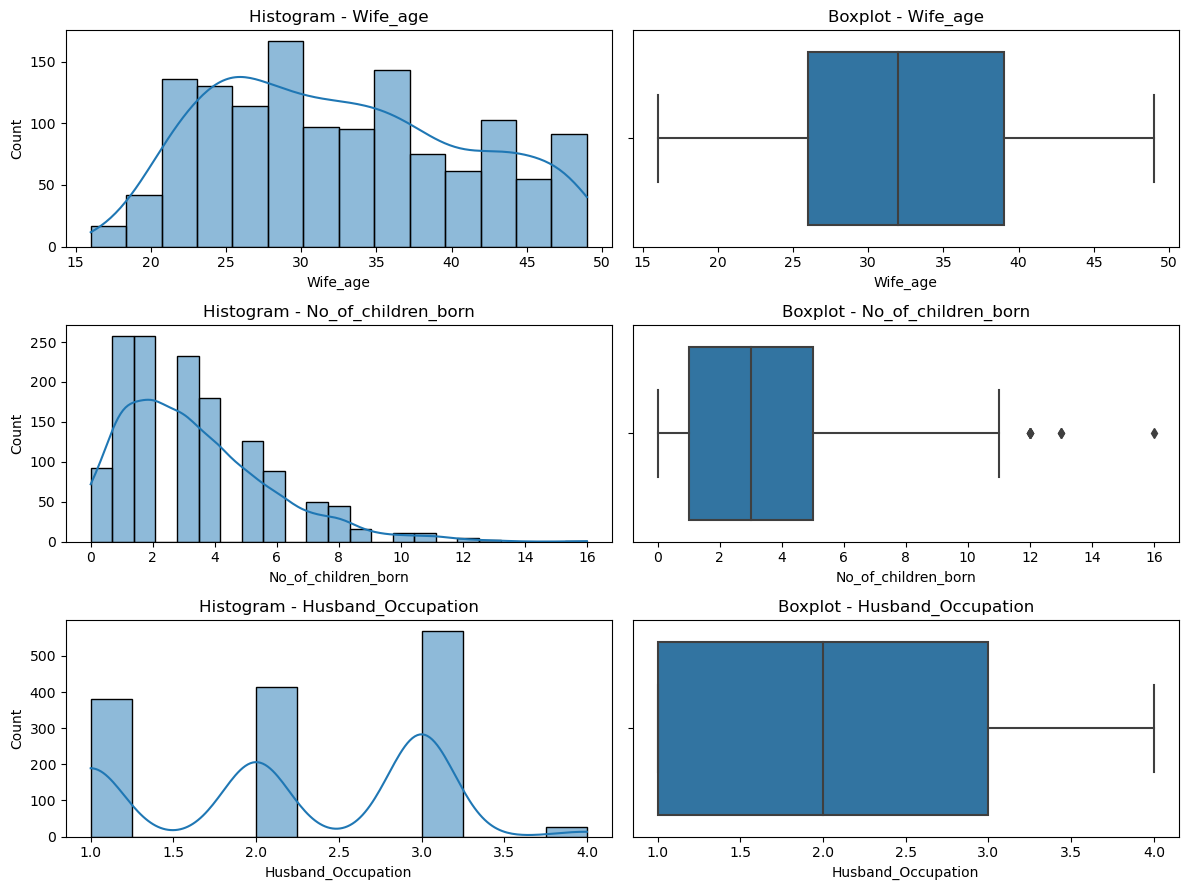

In [72]:
fig, axes = plt.subplots(nrows=len(d_num.columns), ncols=2,figsize=(12, 3 * len(d_num.columns)))
# Loop through numerical columns and create histograms and boxplots
for i, col in enumerate(d_num.columns):
    # Histogram
    sns.histplot(d_num[col], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram - {col}')
    # Boxplot
    sns.boxplot(x=d_num[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot - {col}')
# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
d["Wife_age"].describe()

In [ ]:
d.No_of_children_born.describe()

In [73]:
d.Husband_Occupation.describe()

count    1393.000000
mean        2.174444
std         0.854590
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Husband_Occupation, dtype: float64

* range of wife age in between 16 to 49
* 50% of no.of children born is 5
* maximum of husband  occupation is 4.

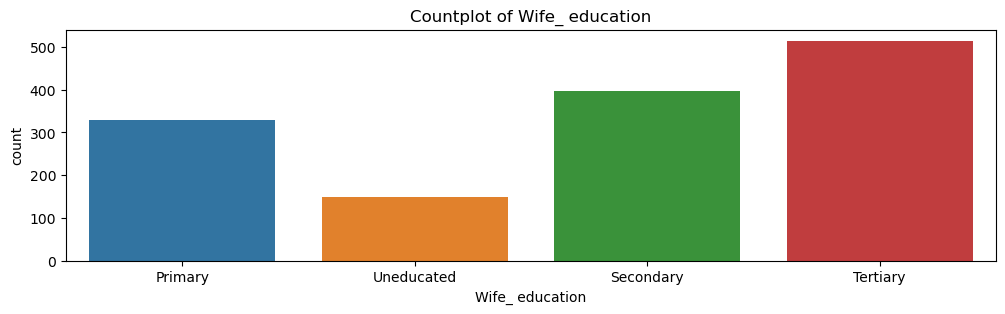

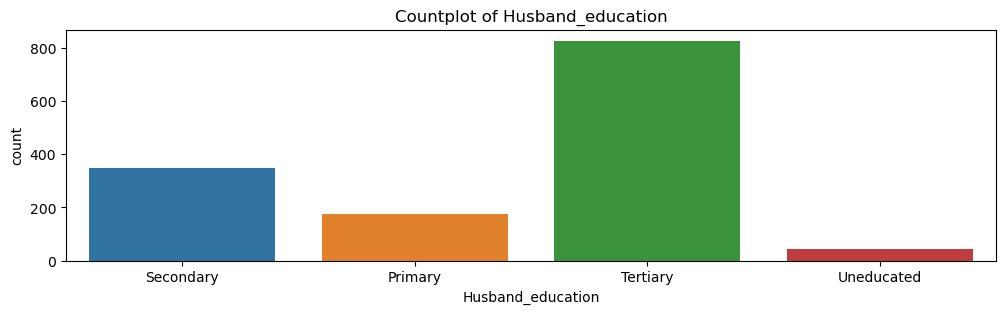

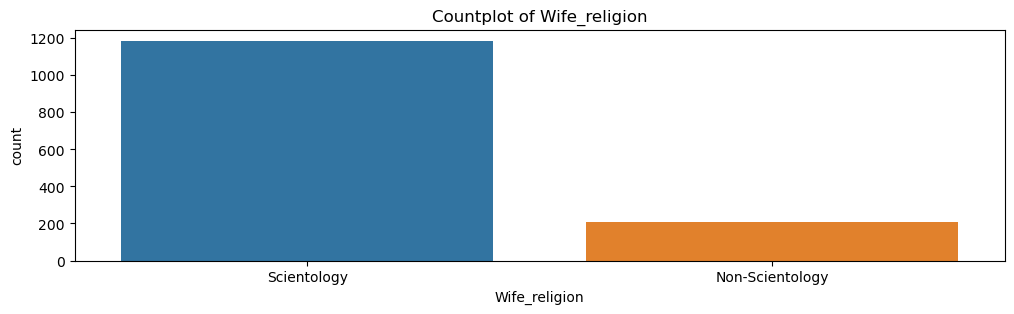

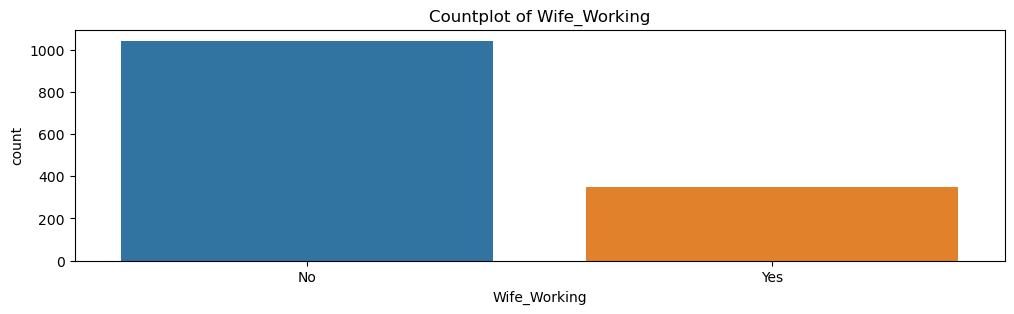

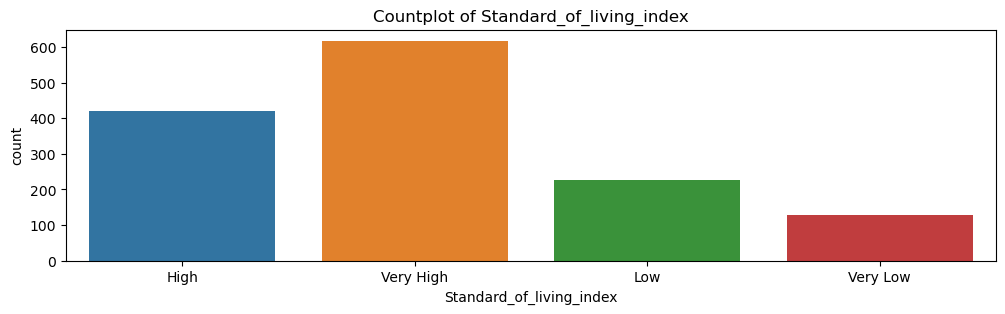

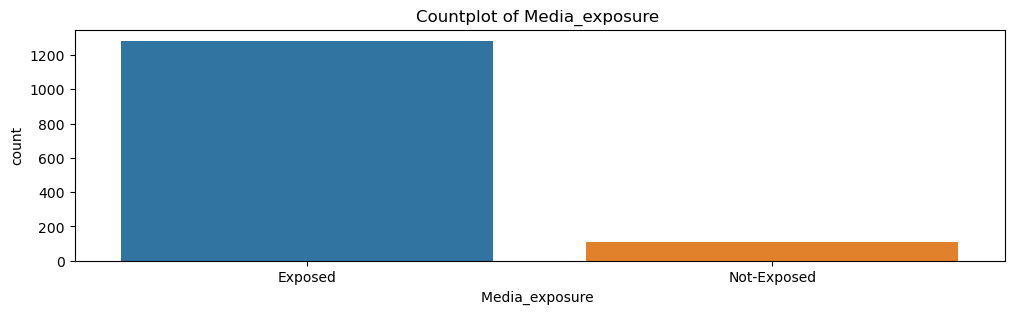

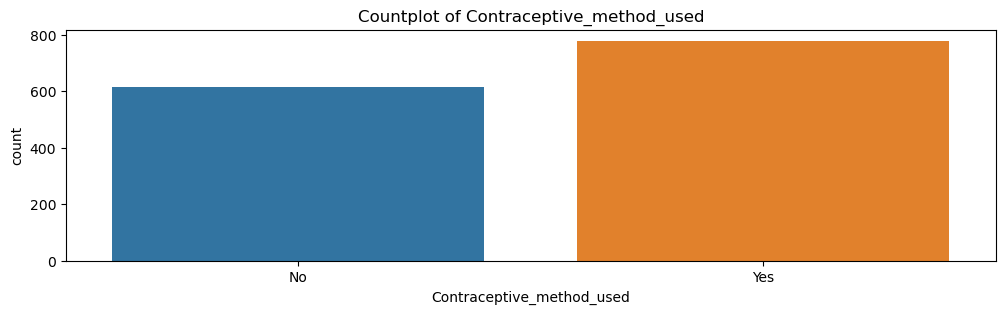

In [74]:
#Countplots of categorical variable
for i in range(len(d_cat.columns)):
    plt.figure(figsize=(12, 3))
    sns.countplot(x=d_cat.columns[i], data=d_cat)
    plt.title(f"Countplot of {d_cat.columns[i]}")
    plt.show()

* tertionary education is high for both wife,s and husband's education.
* both are have  smallest amount uneducated persons.
* uneducated persons are high in wifes than husbands
* scientology is high for wife's religion.
* wifes are not working
* highest persons  standard living index is "very high" category. 
* more persons are media exposure.
* more persons used the contraceptive  method.

#### multivariate analysis

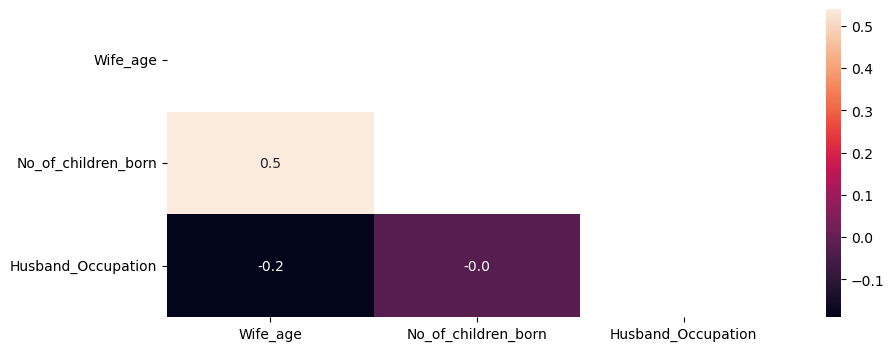

In [75]:
#correlation heat map.
cor=d_num.corr(method="pearson")
mask=np.triu(np.ones_like(cor,dtype=np.bool_))
fig = plt.subplots(figsize=(10, 4))
sns.heatmap(d_num.corr(), annot=True,fmt='.1f',mask=mask)
plt.show()

* wife,s age and husband occupation are higly negatively correlated.
* no.of children born and husband occupation are negatively correlated.
* no.of children born and wife age are positively correlated.

<Figure size 1000x1000 with 0 Axes>

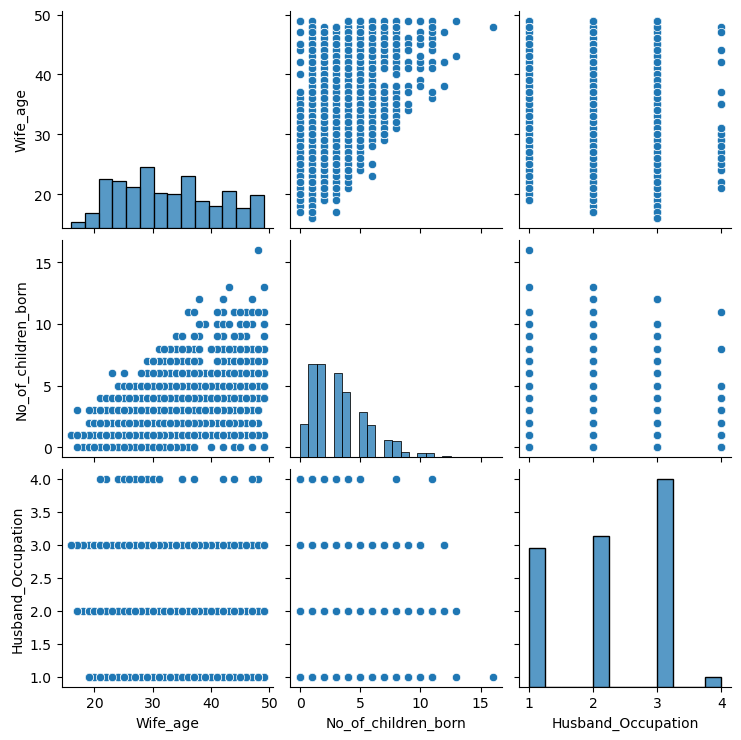

In [76]:
#pair plot of numerical variables
plt.figure(figsize=(10,10))
sns.pairplot(d_num)
plt.show()

<Axes: xlabel='Contraceptive_method_used', ylabel='No_of_children_born'>

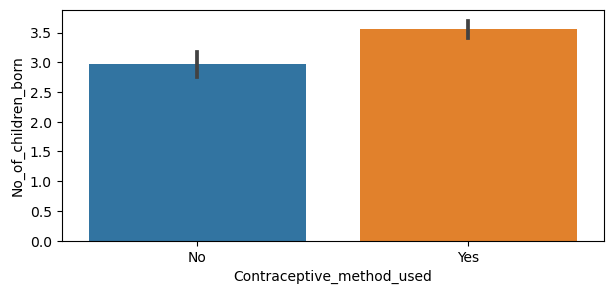

In [77]:
#barplot of "Contraceptive_method_used" with "No_of_children_born"
plt.figure(figsize=(7,3))
sns.barplot(data=d,x="Contraceptive_method_used",y="No_of_children_born")

couples have a high number of children, who are more used to contraceptive methods

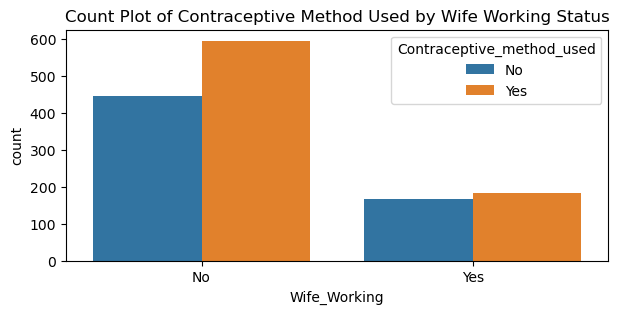

In [78]:
#barplot of "Contraceptive_method_used" with "wife working"
plt.figure(figsize=(7, 3))
sns.countplot(data=d, x="Wife_Working", hue="Contraceptive_method_used")
plt.title('Count Plot of Contraceptive Method Used by Wife Working Status')
plt.show()

* wife's not working couples are more using contraceptive method than wife's working couples.
* taking working wife's couples whose use contraceptive method

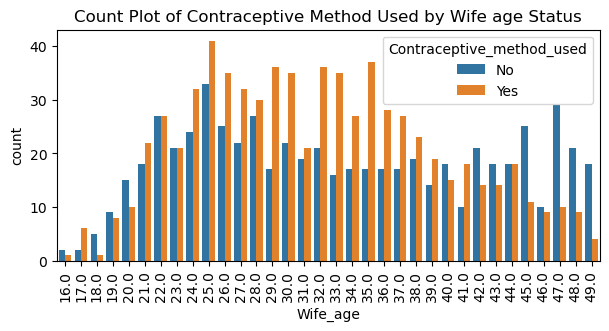

In [79]:
#Count Plot of Contraceptive Method Used by Wife age Status
plt.figure(figsize=(7, 3))
sns.countplot(data=d, x="Wife_age",hue="Contraceptive_method_used")
plt.title('Count Plot of Contraceptive Method Used by Wife age Status')
plt.xticks(rotation=90)
plt.show()

* wife's age 25 couples who are most using contraceptive method.
* wife's age 42 to 49 couples who are more  not using contraceptive method.

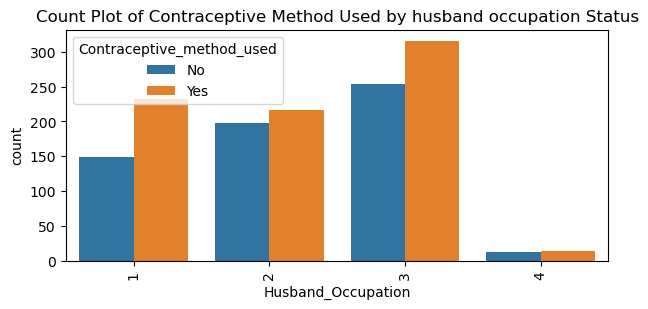

In [80]:
# Count Plot of Contraceptive Method Used by husband occupation Status')
plt.figure(figsize=(7, 3))
sns.countplot(data=d, x="Husband_Occupation",hue="Contraceptive_method_used")
plt.title('Count Plot of Contraceptive Method Used by husband occupation Status')
plt.xticks(rotation=90)
plt.show()

* 3 husband occupation couples are more using contraceptive method.
* 4 husband occupation couples are less using contraceptive method.

In [81]:
d.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

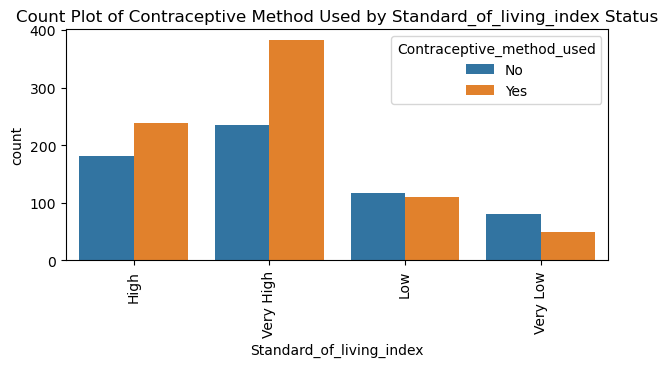

In [82]:
#Count Plot of Contraceptive Method Used by Standard_of_living_index Status'
plt.figure(figsize=(7, 3))
sns.countplot(data=d, x="Standard_of_living_index",hue="Contraceptive_method_used")
plt.title('Count Plot of Contraceptive Method Used by Standard_of_living_index Status')
plt.xticks(rotation=90)
plt.show()

"very high"standard of living index couples are most using contraceptive method.

###### Use appropriate visualizations to identify the patterns and insights - Key meaningful observations on individual variables and the relationship between variables

#### Insights


* The dataset contains 1473 rows and 10 columns.
* Data types include 7 object (likely categorical), 1 int, and 2 float.
* wife_age , No_of_children_born columns have null values
* There are 80 rows with duplicated values.
* Tertiary education is high for both wives and husbands.
* Uneducated persons are more common among wives than husbands.
* Scientology is the predominant religion among wives.
* Most wives are not working.
* The highest standard of living index is in the "very high" category.
* A significant number of persons have media exposure.
* A considerable number of persons use contraceptive methods.
* Couples with a "very high" standard of living index are more likely to use contraceptives.

* Wife's age and husband's occupation are highly negatively correlated.
* Number of children born and husband's occupation are negatively correlated.
* Number of children born and wife's age are positively correlated.
* Couples with working wives are more likely to use contraceptive methods.
* Couples with wives aged 25 are most likely to use contraceptive methods.
* Couples with wives aged 42 to 49 are more likely not to use contraceptive methods.
* Couples with specific husband occupations (3 and 4) are more likely to use or not use contraceptive methods.

### 2 -2- Data Pre-processing
Prepare the data for modelling: - Missing value Treatment (if needed) - Outlier Detection(treat, if needed) - Feature Engineering (if needed) - Encode the data - Train-test split

In [83]:
#check null values
d.isnull().sum()

Wife_age                     67
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

wife_age has 67 , No_of_children_born has 21  null values

In [84]:
# replace null values by its means 
d["Wife_age"]=d["Wife_age"].fillna(d["Wife_age"].mean())
d["No_of_children_born"]=d["No_of_children_born"].fillna(d["No_of_children_born"].mean())

In [85]:
#its change to the d_num data frame
d_num["Wife_age"]=d_num["Wife_age"].fillna(d_num["Wife_age"].mean())
d_num["No_of_children_born"]=d_num["No_of_children_born"].fillna(d_num["No_of_children_born"].mean())

In [86]:
# check null value after null value treatment
d.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [87]:
d_num.columns

Index(['Wife_age', 'No_of_children_born', 'Husband_Occupation'], dtype='object')

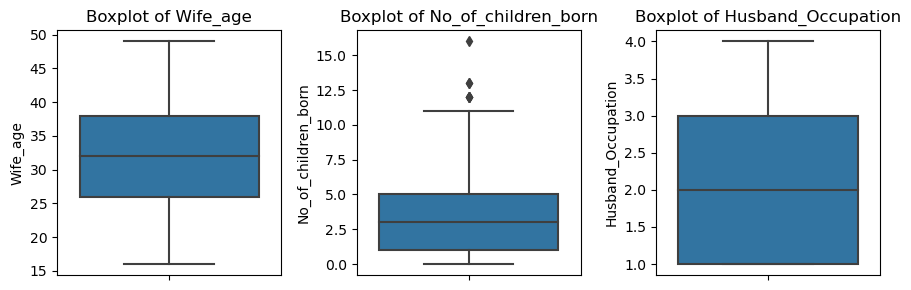

In [88]:
#check outliers
plt.figure(figsize=(9,3))
lists=d_num.columns
for i in range(len(lists)):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=d_num[lists[i]],data=d_num)
    plt.title("Boxplot of {}".format(lists[i]))
    plt.tight_layout()

outliers present in higher values of "No_of_children_born".

In [89]:
#remove outliers
def remove_outliers(col):
    sorted(col)
    q1,q3=np.percentile(col,[25,75])
    IQR=q3-q1
    lw=q1-(1.5*IQR)
    hi=q3+(1.5*IQR)
    return lw,hi

In [90]:
low,hig=remove_outliers(d_num["No_of_children_born"])
d_num["No_of_children_born"]=np.where(d_num["No_of_children_born"]<low,low,d_num["No_of_children_born"])
d_num["No_of_children_born"]=np.where(d_num["No_of_children_born"]>hig,hig,d_num["No_of_children_born"])

<Axes: >

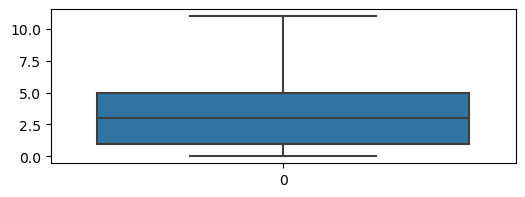

In [91]:
#boxplot of "No_of_children_born"after treatment
plt.figure(figsize=(6,2))
sns.boxplot(d_num["No_of_children_born"])

#### Feature Engineering (if needed) 

In [92]:
d_num.head()

Wife_age  No_of_children_born  Husband_Occupation
0      24.0                  3.0                   2
1      45.0                 10.0                   3
2      43.0                  7.0                   3
3      42.0                  9.0                   3
4      36.0                  8.0                   3

In [93]:
d_num.isnull().sum()

Wife_age               0
No_of_children_born    0
Husband_Occupation     0
dtype: int64

In [94]:
d_cat.head()

Wife_ education Husband_education Wife_religion Wife_Working  \
0         Primary         Secondary   Scientology           No   
1      Uneducated         Secondary   Scientology           No   
2         Primary         Secondary   Scientology           No   
3       Secondary           Primary   Scientology           No   
4       Secondary         Secondary   Scientology           No   

  Standard_of_living_index Media_exposure  Contraceptive_method_used  
0                     High         Exposed                        No  
1                Very High         Exposed                        No  
2                Very High         Exposed                        No  
3                     High         Exposed                        No  
4                      Low         Exposed                        No

In [95]:
#create new data frame with both numerical and categorical variables.
d_nw= pd.concat([d_num, d_cat], axis=1)

In [96]:
#data types of data frames
d_nw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   No_of_children_born        1393 non-null   float64
 2   Husband_Occupation         1393 non-null   int64  
 3   Wife_ education            1393 non-null   object 
 4   Husband_education          1393 non-null   object 
 5   Wife_religion              1393 non-null   object 
 6   Wife_Working               1393 non-null   object 
 7   Standard_of_living_index   1393 non-null   object 
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 152.0+ KB


In [97]:
#first 5 rows of new data frame.
d_nw.head()

Wife_age  No_of_children_born  Husband_Occupation Wife_ education  \
0      24.0                  3.0                   2         Primary   
1      45.0                 10.0                   3      Uneducated   
2      43.0                  7.0                   3         Primary   
3      42.0                  9.0                   3       Secondary   
4      36.0                  8.0                   3       Secondary   

  Husband_education Wife_religion Wife_Working Standard_of_living_index  \
0         Secondary   Scientology           No                     High   
1         Secondary   Scientology           No                Very High   
2         Secondary   Scientology           No                Very High   
3           Primary   Scientology           No                     High   
4         Secondary   Scientology           No                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

#####  Encode the data 

In [98]:
#Data Types of new data frame
d_nw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   No_of_children_born        1393 non-null   float64
 2   Husband_Occupation         1393 non-null   int64  
 3   Wife_ education            1393 non-null   object 
 4   Husband_education          1393 non-null   object 
 5   Wife_religion              1393 non-null   object 
 6   Wife_Working               1393 non-null   object 
 7   Standard_of_living_index   1393 non-null   object 
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 152.0+ KB


In [99]:
#value counts of "Contraceptive_method_used"
d_nw["Contraceptive_method_used"].value_counts()

Yes    779
No     614
Name: Contraceptive_method_used, dtype: int64

In [100]:
#in "Contraceptive_method_used" column,yes replace by 1,no replace by 0.
d_nw["Contraceptive_method_used"]=d_nw["Contraceptive_method_used"].replace({"Yes":1,"No":0})
d_nw["Contraceptive_method_used"].value_counts()

1    779
0    614
Name: Contraceptive_method_used, dtype: int64

In [101]:
#encoding data
d_nw=pd.get_dummies(d_nw,drop_first=True)

In [102]:
d_nw .head()

Wife_age  No_of_children_born  Husband_Occupation  \
0      24.0                  3.0                   2   
1      45.0                 10.0                   3   
2      43.0                  7.0                   3   
3      42.0                  9.0                   3   
4      36.0                  8.0                   3   

   Contraceptive_method_used  Wife_ education_Secondary  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          1   
4                          0                          1   

   Wife_ education_Tertiary  Wife_ education_Uneducated  \
0                         0                           0   
1                         0                           1   
2                         0                           0   
3                         0                           0   
4                         0                           0   

   Husband_education_Secondary  Husband_education_Tertiary  \
0                            1                           0   
1                            1                           0   
2                            1                           0   
3                            0                           0   
4                            1                           0   

   Husband_education_Uneducated  Wife_religion_Scientology  Wife_Working_Yes  \
0                             0                          1                 0   
1                             0                          1                 0   
2                             0                          1                 0   
3                             0                          1                 0   
4                             0                          1                 0   

   Standard_of_living_index_Low  Standard_of_living_index_Very High  \
0                             0                                   0   
1                             0                                   1   
2                             0                                   1   
3                             0                                   0   
4                             1                                   0   

   Standard_of_living_index_Very Low  Media_exposure _Not-Exposed  
0                                  0                            0  
1                                  0                            0  
2                                  0                            0  
3                                  0                            0  
4                                  0                            0

In [103]:
#columns of data frame
d_nw.columns

Index(['Wife_age', 'No_of_children_born', 'Husband_Occupation',
       'Contraceptive_method_used', 'Wife_ education_Secondary',
       'Wife_ education_Tertiary', 'Wife_ education_Uneducated',
       'Husband_education_Secondary', 'Husband_education_Tertiary',
       'Husband_education_Uneducated', 'Wife_religion_Scientology',
       'Wife_Working_Yes', 'Standard_of_living_index_Low',
       'Standard_of_living_index_Very High',
       'Standard_of_living_index_Very Low', 'Media_exposure _Not-Exposed'],
      dtype='object')

In [104]:
#shape of data data frame
d_nw.shape

(1393, 16)

#####  Train-test split

In [105]:
# Copy target into the y dataframe. 
y = d_nw['Contraceptive_method_used']
# Copy all the predictor variables into X dataframe
x = d_nw.drop('Contraceptive_method_used', axis=1)

In [106]:
#Train-test split
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.30,random_state=1)

### 2- 3-Model Building and Compare the Performance of the Models
- Build a Logistic Regression model - Build a Linear Discriminant Analysis model - Build a CART model - Prune the CART model by finding the best hyperparameters using GridSearch - Check the performance of the models across train and test set using different metrics - Compare the performance of all the models built and choose the best one with proper rationale


In [107]:
#Build a Logistic Regression model
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

c:\Users\SABIR\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [108]:
# Build Linear Discriminant Analysis model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [109]:
# Build CART model
from sklearn.tree import DecisionTreeClassifier
cart_model = DecisionTreeClassifier(random_state=1)
cart_model.fit(x_train, y_train)


DecisionTreeClassifier(random_state=1)

Applying GridSearchCV for Logistic Regression

In [110]:
#Applying GridSearchCV for Logistic Regression
from sklearn.model_selection import GridSearchCV
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      
      'tol':[0.0001,0.00001]}

In [111]:
purned_cart_model = LogisticRegression(max_iter=10000,n_jobs=2)

In [112]:
grid_search = GridSearchCV(estimator =purned_cart_model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')


In [113]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [114]:
#print best parameters and best estimator
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [115]:
# assigning the best estimator from a grid search 
pgbest_model = grid_search.best_estimator_

In [116]:
# Evaluate models on the train set
logistic_train_preds = logistic_model.predict(x_train)
lda_train_preds = lda_model.predict(x_train)
cart_train_preds = cart_model.predict(x_train)
pruned_cart_train_preds =pgbest_model.predict(x_train)
# Evaluate models on the test set
logistic_test_preds = logistic_model.predict(x_test)
lda_test_preds = lda_model.predict(x_test)
cart_test_preds = cart_model.predict(x_test)
pruned_cart_test_preds =pgbest_model.predict(x_test)

##### logistic model

In [117]:
#classification report of logistic model train data
from sklearn.metrics import classification_report
print(classification_report(y_train,logistic_train_preds))

              precision    recall  f1-score   support

           0       0.63      0.52      0.57       192
           1       0.65      0.75      0.69       226

    accuracy                           0.64       418
   macro avg       0.64      0.63      0.63       418
weighted avg       0.64      0.64      0.64       418



In [118]:
#classification report of logistic model test data
print(classification_report(y_test,logistic_test_preds))

              precision    recall  f1-score   support

           0       0.64      0.53      0.58       422
           1       0.68      0.78      0.73       553

    accuracy                           0.67       975
   macro avg       0.66      0.65      0.65       975
weighted avg       0.67      0.67      0.66       975



In [119]:
## Confusion matrix on the training data
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, logistic_train_preds)

array([[ 99,  93],
       [ 57, 169]], dtype=int64)

In [120]:
## Confusion matrix on the test data
confusion_matrix(y_test,logistic_test_preds)

array([[222, 200],
       [123, 430]], dtype=int64)

AUC:0.695


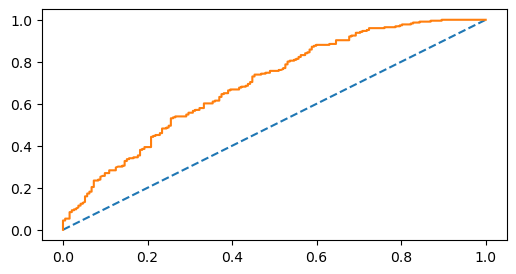

In [121]:
# calculate AUC of train
from sklearn.metrics import roc_auc_score,roc_curve
# predict probabilities
probs=logistic_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs=probs[:,1]
# calculate AUC of train
auc=roc_auc_score(y_train,probs)
print("AUC:%.3f" % auc)
# calculate roc curve
plt.figure(figsize=(6,3))
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.699


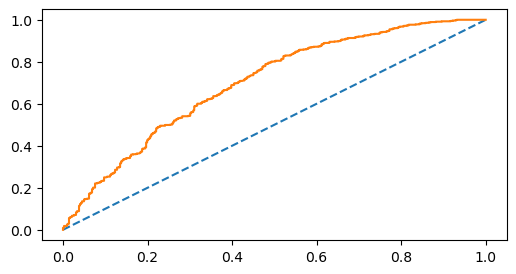

In [122]:
## calculate AUC of test
# predict probabilities
probs = logistic_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(6,3))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

Insights:logistic regresson
* The logstic model's precision is slightly higher for class 1( contraceptive method used) compared to class 0 in both train and test data.
* Recall is higher for class 1, indicating that the model is better at capturing instances where contraceptive methods are used.
* F1-Score provides a balance between precision and recall for each class.
* The overall accuracy of the train logistic model is 64%, suggesting a moderate level of predictive performance.


Insights:
Precision-Recall Trade-off:

In the test data, precision and recall for both classes have increased. This suggests that the model is performing slightly better on the test set.
F1-Score:

F1-scores for both classes have increased in the test data, indicating a better balance between precision and recall.
Accuracy:

The model's accuracy has improved slightly on the test data, reaching 67%, compared to 64% on the training data.
Overall Model Performance:

The model generalizes reasonably well from the training set to the test set, with improvements in precision, recall, and F1-score.
Class Imbalance:

The class imbalance is consistent between the training and test sets, with class 1 having higher support than class 0.
Comparative Performance:

The model appears to generalize well, as indicated by the similar macro and weighted averages for precision, recall, and F1-score between the training and test sets.
Areas for Consideration:

While the model is showing improvement on the test set, consider further refinement, parameter tuning, or exploration of additional features for enhanced performance.

#### Linear Discriminant Analysis model

In [123]:
#classification report of Linear Discriminant Analysis model train data
print(classification_report(y_train,lda_train_preds))

              precision    recall  f1-score   support

           0       0.63      0.50      0.56       192
           1       0.64      0.75      0.69       226

    accuracy                           0.64       418
   macro avg       0.64      0.63      0.62       418
weighted avg       0.64      0.64      0.63       418



In [124]:
#classification report of#classification report of Linear Discriminant Analysis model train data model test data
print(classification_report(y_test,lda_test_preds))

              precision    recall  f1-score   support

           0       0.63      0.52      0.57       422
           1       0.68      0.77      0.72       553

    accuracy                           0.66       975
   macro avg       0.66      0.65      0.65       975
weighted avg       0.66      0.66      0.66       975



In [125]:
# calculate AUC of train
# predict probabilities
probs=lda_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs=probs[:,1]
# calculate AUC of test
auc=roc_auc_score(y_train,probs)
print("AUC:%.3f" % auc)

AUC:0.696


In [126]:
# predict probabilities
probs=lda_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs=probs[:,1]
# calculate AUC of train
auc=roc_auc_score(y_test,probs)
print("AUC:%.3f" % auc)

AUC:0.695


In [127]:
#confusion matrix of  Linear Discriminant Analysis model train data
confusion_matrix(y_train,lda_train_preds)

array([[ 96,  96],
       [ 56, 170]], dtype=int64)

In [128]:
#confusion matrix of  Linear Discriminant Analysis model test data
confusion_matrix(y_test,lda_test_preds)

array([[219, 203],
       [126, 427]], dtype=int64)

* Overall accuracy increased from 0.64 in the train data to 0.66 in the test data.The overall accuracy improved on the test data, indicating that the model generalizes well to new, unseen instances.
* class 1 is more better than class 0.
* the model's performance on the test data is slightly better than on the train data. The improvements in precision, recall, and F1-score for both classes, as well as the increase in overall accuracy, suggest that the model generalizes well and performs effectively on new, unseen data.

#####  CART model 

In [129]:
#classification_report of CART model train data
print(classification_report(y_train,cart_train_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       192
           1       1.00      0.98      0.99       226

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418



In [130]:
#classification_report of CART model test data
print(classification_report(y_test,cart_test_preds))

              precision    recall  f1-score   support

           0       0.54      0.60      0.57       422
           1       0.67      0.61      0.64       553

    accuracy                           0.61       975
   macro avg       0.60      0.61      0.60       975
weighted avg       0.61      0.61      0.61       975



In [131]:
# calculate AUC of train
# predict probabilities
probs=cart_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs=probs[:,1]
# calculate AUC of train
auc=roc_auc_score(y_train,probs)
print("AUC:%.3f" % auc)

AUC:1.000


In [132]:
# calculate AUC of test
# predict probabilities
probs=cart_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs=probs[:,1]
# calculate AUC of test
auc=roc_auc_score(y_test,probs)
print("AUC:%.3f" % auc)

AUC:0.611


In [133]:
##confusion matrix of CART model train data
confusion_matrix(y_train,cart_train_preds)

array([[192,   0],
       [  5, 221]], dtype=int64)

In [134]:
##confusion matrix of CART model test data
confusion_matrix(y_test,cart_test_preds)

array([[253, 169],
       [214, 339]], dtype=int64)

* Insights:

Precision and Recall Drop: Precision and recall for both classes are notably lower in the test data compared to the training data. This suggests that the model is not generalizing well to unseen examples, leading to more false positives and false negatives.

Class Imbalance Impact: The support values in the test data are larger than in the training data, indicating a different distribution. Class 1 has more instances, which might be impacting the model's performance differently than in the training data.

Overall Lower Performance: The lower accuracy, macro-average F1-score, and weighted-average F1-score on the test data indicate a decrease in overall model performance when applied to new, unseen samples.

Potential Overfitting: The high performance on the training data (0.99 accuracy and F1-scores) suggests the possibility of overfitting. The model might have learned the training data too well, capturing noise or specific patterns that do not generalize to the test data.

Adjustment Needed: Considering the disparities between the training and test data metrics, it might be beneficial to reevaluate the model, potentially adjusting hyperparameters, using more diverse training data, or employing regularization techniques to enhance generalization.

In summary, the model shows signs of overfitting and struggles to generalize well to the test data. Further model tuning and investigation into the data distribution differences could lead to improvements.

#### Prune the CART model

In [135]:
#classification_report of  Prune the CART model train data
print(classification_report(y_train,pruned_cart_train_preds))

              precision    recall  f1-score   support

           0       0.63      0.52      0.57       192
           1       0.65      0.75      0.69       226

    accuracy                           0.64       418
   macro avg       0.64      0.63      0.63       418
weighted avg       0.64      0.64      0.64       418



In [136]:
#classification_report of  Prune the CART model test data
print(classification_report(y_test,pruned_cart_test_preds))

              precision    recall  f1-score   support

           0       0.64      0.52      0.57       422
           1       0.68      0.77      0.72       553

    accuracy                           0.66       975
   macro avg       0.66      0.65      0.65       975
weighted avg       0.66      0.66      0.66       975



In [137]:
# calculate AUC of train
# predict probabilities
probs=pgbest_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs=probs[:,1]
# calculate AUC of train
auc=roc_auc_score(y_train,probs)
print("AUC:%.3f" % auc)

AUC:0.696


In [138]:
# calculate AUC of test
# predict probabilities
probs=pgbest_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs=probs[:,1]
# calculate AUC of train
auc=roc_auc_score(y_test,probs)
print("AUC:%.3f" % auc)

AUC:0.698


In [139]:
#confusion matrix of pruned CART model train data
confusion_matrix(y_train,pruned_cart_train_preds)

array([[ 99,  93],
       [ 57, 169]], dtype=int64)

In [140]:
#confusion matrix of pruned CART model test data
confusion_matrix(y_test,pruned_cart_test_preds)

array([[221, 201],
       [127, 426]], dtype=int64)

* Insights:

Accuracy Improvement: The accuracy on the test data (66%) is slightly higher than that on the train data (64%). This suggests that the model generalizes well to unseen data.

Class-Specific Metrics: In both train and test data, class 1 (positive class) generally has higher precision, recall, and F1-score compared to class 0 (negative class). This indicates that the model performs better on identifying instances of class 1.

Consistency: The macro and weighted averages for precision, recall, and F1-score are relatively consistent between the train and test data, indicating that the model's performance is similar across the two datasets.

Overfitting Consideration: The small difference in performance metrics between train and test data suggests that overfitting might not be a significant issue. The model seems to generalize reasonably well to unseen data.

Room for Improvement: While the model is performing decently, there is room for improvement, especially in terms of precision and recall for class 0.


### Inferences of logistics model:
###### Class 0 (Contraceptive Method Not Used):
* Precision: 64%
Among the instances predicted as not using contraceptive methods, 64% are correctly classified.
* Recall: 53%
Out of all instances where couples are not using contraceptive methods, the model correctly identifies 53%.
* F1-Score: 58%
The F1-Score, a balance between precision and recall, is 58% for couples not using contraceptive methods.

###### Class 1 (Contraceptive Method Used):
* Precision: 68%
Among the instances predicted as using contraceptive methods, 68% are correctly classified.
* Recall: 78%
Out of all instances where couples are using contraceptive methods, the model correctly identifies 78%.
* F1-Score: 73%
The F1-Score, a balance between precision and recall, is 73% for couples using contraceptive methods.
###### Accuracy: 67%
The overall accuracy of the model across both classes is 67%, indicating the proportion of correctly predicted instances.

Accuracy, AUC, Precision and Recall for test data is almost inline with training data. This proves no overfitting or underfitting has happened, and overall the model is a good model for classification.

### Inferences of Linear Discriminant Analysis model:

###### Class 0 (Contraceptive Method Not Used):
Precision: 63%
Among the instances predicted as not using contraceptive methods, 63% are correctly classified.
###### Recall: 52%
Out of all instances where couples are not using contraceptive methods, the model correctly identifies 52%.
###### F1-Score: 57%
The F1-Score, a balance between precision and recall, is 57% for couples not using contraceptive methods.
Class 1 (Contraceptive Method Used):
###### Precision: 68%
Among the instances predicted as using contraceptive methods, 68% are correctly classified.
###### Recall: 77%
Out of all instances where couples are using contraceptive methods, the model correctly identifies 77%.
###### F1-Score: 72%
The F1-Score, a balance between precision and recall, is 72% for couples using contraceptive methods.
Overall Model Performance:
###### Accuracy: 66%
The overall accuracy of the model across both classes is 66%, indicating the proportion of correctly predicted instances.

* Accuracy, AUC, Precision and Recall for test data is almost inline with training data. This proves no overfitting or underfitting has happened, and overall the model is a good model for classification

* The model shows a better performance in predicting couples using contraceptive methods (Class 1) compared to those not using (Class 0).
* For Class 1, the model has a higher precision and recall, indicating a better ability to identify instances where contraceptive methods are used.
* For Class 0, precision is moderate, but recall is relatively lower, suggesting room for improvement in identifying instances where contraceptive methods are not used.


### Inferences of CART model model:

##### Class 0 (Contraceptive Method Not Used):
* Precision: 54%
Among the instances predicted as not using contraceptive methods, 54% are correctly classified.
* Recall: 60%
Out of all instances where couples are not using contraceptive methods, the model correctly identifies 60%.
* F1-Score: 57%
The F1-Score, a balance between precision and recall, is 57% for couples not using contraceptive methods.
###### Class 1 (Contraceptive Method Used):
* Precision: 67%
Among the instances predicted as using contraceptive methods, 67% are correctly classified.
* Recall: 61%
Out of all instances where couples are using contraceptive methods, the model correctly identifies 61%.
* F1-Score: 64%
The F1-Score, a balance between precision and recall, is 64% for couples using contraceptive methods.
* Overall Model Performance:
###### Accuracy: 61%
The overall accuracy of the model across both classes is 61%, indicating the proportion of correctly predicted instances.

Insights:
* Precision and Recall Drop: Precision and recall for both classes are notably lower in the test data compared to the training data. This suggests that the model is not generalizing well to unseen examples, leading to more false positives and false negatives.
* The high performance on the training data (0.99 accuracy and F1-scores) suggests the possibility of overfitting. The model might have learned the training data too well, capturing noise or specific patterns that do not generalize to the test data.
* the model shows signs of overfitting and struggles to generalize well to the test data. Further model tuning and investigation into the data distribution differences could lead to improvements.

### Inferences of Prune the CART model:

###### Class 1 (Contraceptive Method Used):
* Precision: 68%
Among the instances predicted as using contraceptive methods, 68% are correctly classified.
* Recall: 77%
Out of all instances where couples are using contraceptive methods, the model correctly identifies 77%.
* F1-Score: 72%
The F1-Score, a balance between precision and recall, is 72% for couples using contraceptive methods.
* Overall Model Performance:
###### Accuracy: 66%
The overall accuracy of the model across both classes is 66%, indicating the proportion of correctly predicted instances.
* Summary:
The model demonstrates a balanced performance between Class 0 and Class 1, with a slightly higher F1-Score for Class 1.
For Class 0, recall is relatively lower, suggesting room for improvement in identifying instances where contraceptive methods are not used.
For Class 1, precision is relatively higher, indicating a better ability to identify instances where contraceptive methods are used.

* Accuracy, AUC, Precision and Recall for test data is almost inline with training data. This proves no overfitting or underfitting has happened, and overall the model is a good model for classification.

### Comparison and Selection:
###### Logistic Regression vs. LDA:
Both models show similar performance metrics, with Logistic Regression having a slightly higher accuracy.
###### Logistic Regression vs. CART:
Logistic Regression outperforms CART in terms of accuracy and F1-Score for both classes.
###### Logistic Regression vs. Pruned CART:
Both models have similar performance in terms of accuracy and F1-Score for Class 1, but Logistic Regression has better precision and recall for Class 0.
###### Best Model: Logistic Regression
Logistic Regression appears to be the better-performing model overall, demonstrating higher accuracy and balanced precision and recall for both classes.
### Rationale:
* Logistic Regression provides a good balance between precision and recall for both classes.
* It shows consistent performance across accuracy, precision, recall, and F1-Score on both training and test data.
* The model has no signs of overfitting or underfitting, as evidenced by similar metrics on the training and test datasets.
* In summary, based on the provided metrics and comparison, the Logistic Regression model seems to be the most suitable for the given classification task.

## 2-4 Business Insights & Recommendations
- Comment on the importance of features based on the best model - Conclude with the key takeaways (actionable insights and recommendations) for the business

### Answers:

In [141]:
#####  importance of features based on the best model

* Logistic Regression appears to be the better-performing model overall, demonstrating higher accuracy and balanced precision and recall for both classes.
* Logistic Regression provides a good balance between precision and recall for both classes.
* It shows consistent performance across accuracy, precision, recall, and F1-Score on both training and test data.
* The model has no signs of overfitting or underfitting, as evidenced by similar metrics on the training and test datasets.
* In summary, based on the provided metrics and comparison, the Logistic Regression model seems to be the most suitable for the given classification task.

##### Actionable Insights:
Logistic Regression appears to be the better-performing model overall, demonstrating higher accuracy and balanced precision and recall for both classes.
Logistic Regression provides a good balance between precision and recall for both classes.
It shows consistent performance across accuracy, precision, recall, and F1-Score on both training and test data.
The model has no signs of overfitting or underfitting, as evidenced by similar metrics on the training and test datasets.
In summary, based on the provided metrics and comparison, the Logistic Regression model seems to be the most suitable for the given classification task.
* 1. Precision and Recall Analysis:
Precision for Class 1 (Contraceptive Method Used):

The model has a precision of 68%, indicating that 68% of the couples predicted to be using contraceptive methods are correctly classified. This is valuable for targeted interventions as it minimizes false positives.
Recall for Class 1:

The recall for Class 1 is 78%, suggesting that the model correctly identifies 78% of the couples who are actually using contraceptive methods. This is crucial for ensuring that couples in need of contraceptive support are appropriately identified.
*  2. Importance of Features:
Identify Key Features:

Explore the coefficients of the Logistic Regression model to identify the features contributing significantly to the prediction of contraceptive use.
Positive and Negative Impact:

Understand whether specific features have a positive or negative impact on the likelihood of contraceptive use. This insight can guide targeted interventions.
* 3. Logistic Regression as the Best Model:
Model Trustworthiness:

The Logistic Regression model outperforms other models, demonstrating higher accuracy, precision, and recall. The model's consistency across training and test data indicates its reliability.
Interpretability:

Logistic Regression provides a clear interpretation of feature importance, making it suitable for understanding the factors influencing contraceptive use.

#### Key Observations:
###### Educational and Religious Factors:
* Tertiary education is high for both wives and husbands.
* Uneducated persons are more common among wives.
* Scientology is the predominant religion among wives.
###### Employment and Standard of Living:
* Most wives are not working.
* The highest standard of living index is in the "very high" category.
###### Contraceptive Usage:
* A considerable number of persons use contraceptive methods.
* Couples with a "very high" standard of living index are more likely to use contraceptives.
* Couples with working wives are more likely to use contraceptive methods.
###### Demographic Correlations:
* Wife's age and husband's occupation are highly negatively correlated.
* Number of children born and husband's occupation are negatively correlated.
* Number of children born and wife's age are positively correlated.
###### Age and Contraceptive Usage:
* Couples with wives aged 25 are most likely to use contraceptive methods.
* Couples with wives aged 42 to 49 are more likely not to use contraceptive methods.
###### Occupational Influence:
* Couples with specific husband occupations (3 and 4) are more likely to use or not use contraceptive methods.
### Actionable Insights:
* Targeted Educational Programs:
Develop educational programs targeting wives with lower education levels to increase awareness of contraceptive methods.
* Religious and Cultural Sensitivity:
Consider the predominant religion (Scientology) among wives when designing family planning campaigns, ensuring cultural sensitivity.
* Workforce Engagement:
Encourage and support workforce engagement for wives, as couples with working wives are more likely to use contraceptive methods.
* Tailored Age-Based Interventions:
Tailor family planning interventions based on age groups. For example, focus on promoting contraceptive methods among couples with wives aged 25.
* Occupational Guidance:
Provide targeted guidance for couples with specific husband occupations (3 and 4) regarding contraceptive choices.
* Continuous Monitoring:
Continuously monitor demographic and cultural shifts to adapt family planning strategies accordingly.
###### Model Comparison Insights:
* Logistic Regression Superiority:
Logistic Regression outperforms both CART and Pruned CART in terms of accuracy and F1-Score for both classes.
* Precision and Recall Balance:
Logistic Regression exhibits a better balance between precision and recall for both classes, making it a suitable model for the classification task.
* Consistent Performance:
Logistic Regression shows consistent performance across training and test datasets, indicating its reliability and generalizability.
#### Business Recommendations:
* Invest in Education:
Invest in educational programs to empower women with knowledge about family planning, particularly among those with lower education levels.
* Promote Workplace Inclusion:
Encourage workplace inclusion for women to positively impact contraceptive use, as observed in couples with working wives.
* Culturally Tailored Campaigns:
Develop culturally tailored family planning campaigns that consider religious and cultural nuances.
* Age-Stratified Interventions:
Implement age-stratified interventions to address the varying contraceptive needs across different age groups.
* Occupational Guidance Services:
Offer guidance services for couples with specific husband occupations, addressing their unique family planning considerations.
* Regular Assessments:
Regularly assess and update family planning strategies based on evolving demographic trends and societal changes.


* Targeted Outreach Programs: Precision-Driven Interventions: Leverage the precision of 68% to implement targeted outreach programs for couples who are predicted to be using contraceptive methods. This helps ensure efficient allocation of resources.
* Feature-Informed Interventions: Focus on Influential Features: Utilize the insights from influential features to tailor interventions. Features with a higher impact on contraceptive use can guide the development of targeted educational campaigns or support services.
* Collaboration with Healthcare Providers: Healthcare Provider Partnerships: Collaborate with healthcare providers to enhance family planning services. The model's predictions can inform providers about potential contraceptive needs, allowing for proactive counseling.
* Continuous Monitoring: Regular Model Monitoring: Implement a system for continuous monitoring of the model's performance. Periodically reassess the model's accuracy and update it as needed to reflect changes in the population.
* Community Engagement: Community Workshops and Education: Conduct community workshops and educational campaigns based on the identified influential features. This can empower communities with information about family planning and contraceptive methods. 
* Key Takeaways: The Logistic Regression model offers a reliable tool for predicting contraceptive use. Precision and recall metrics provide insights into the model's ability to identify couples using contraceptive methods accurately. Targeted interventions informed by influential features can improve the effectiveness of family planning programs.